In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.ticker import FormatStrFormatter
import matplotlib.gridspec as gridspec

from gwbird import detectors
from gwbird.detectors import LISA_noise_AET
from gwbird import nell
from gwbird import pls
from gwbird.overlap import Response
from gwbird.nell import AngularResponse, Sensitivity_ell

%config InlineBackend.figure_format = 'retina'

plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['font.family'] = 'serif'

# Code example for LISA

* Response (Overlap Reduction Function)

In [32]:
f = np.logspace(-5, 0, 1000)

print('Calculating Overlaps...')
print('- tensor modes')
print(' - auto')
R_auto_t = Response.overlap('LISA X', 'LISA X', f, 0, 't', None)
print(' - cross')
R_cross_t = Response.overlap('LISA X', 'LISA Y', f, 0, 't', None)
print('- vector modes')
print(' - auto')
R_auto_v = Response.overlap('LISA X', 'LISA X', f, 0, 'v', None)
print(' - cross')
R_cross_v = Response.overlap('LISA X', 'LISA Y', f, 0, 'v', None)
print('- scalar modes')
print(' - auto')
R_auto_s = Response.overlap('LISA X', 'LISA X', f, 0, 's', None)
print(' - cross')
R_cross_s = Response.overlap('LISA X', 'LISA Y', f, 0, 's', None)
print('- V')
print(' - auto')
R_auto_V = Response.overlap('LISA X', 'LISA X', f, 0, 'V', None)
print(' - cross')
R_cross_V = Response.overlap('LISA X', 'LISA Y', f, 0, 'V', None)


Calculating Overlaps...
- tensor modes
 - auto
 - cross
- vector modes
 - auto
 - cross
- scalar modes
 - auto
 - cross
- V
 - auto
 - cross


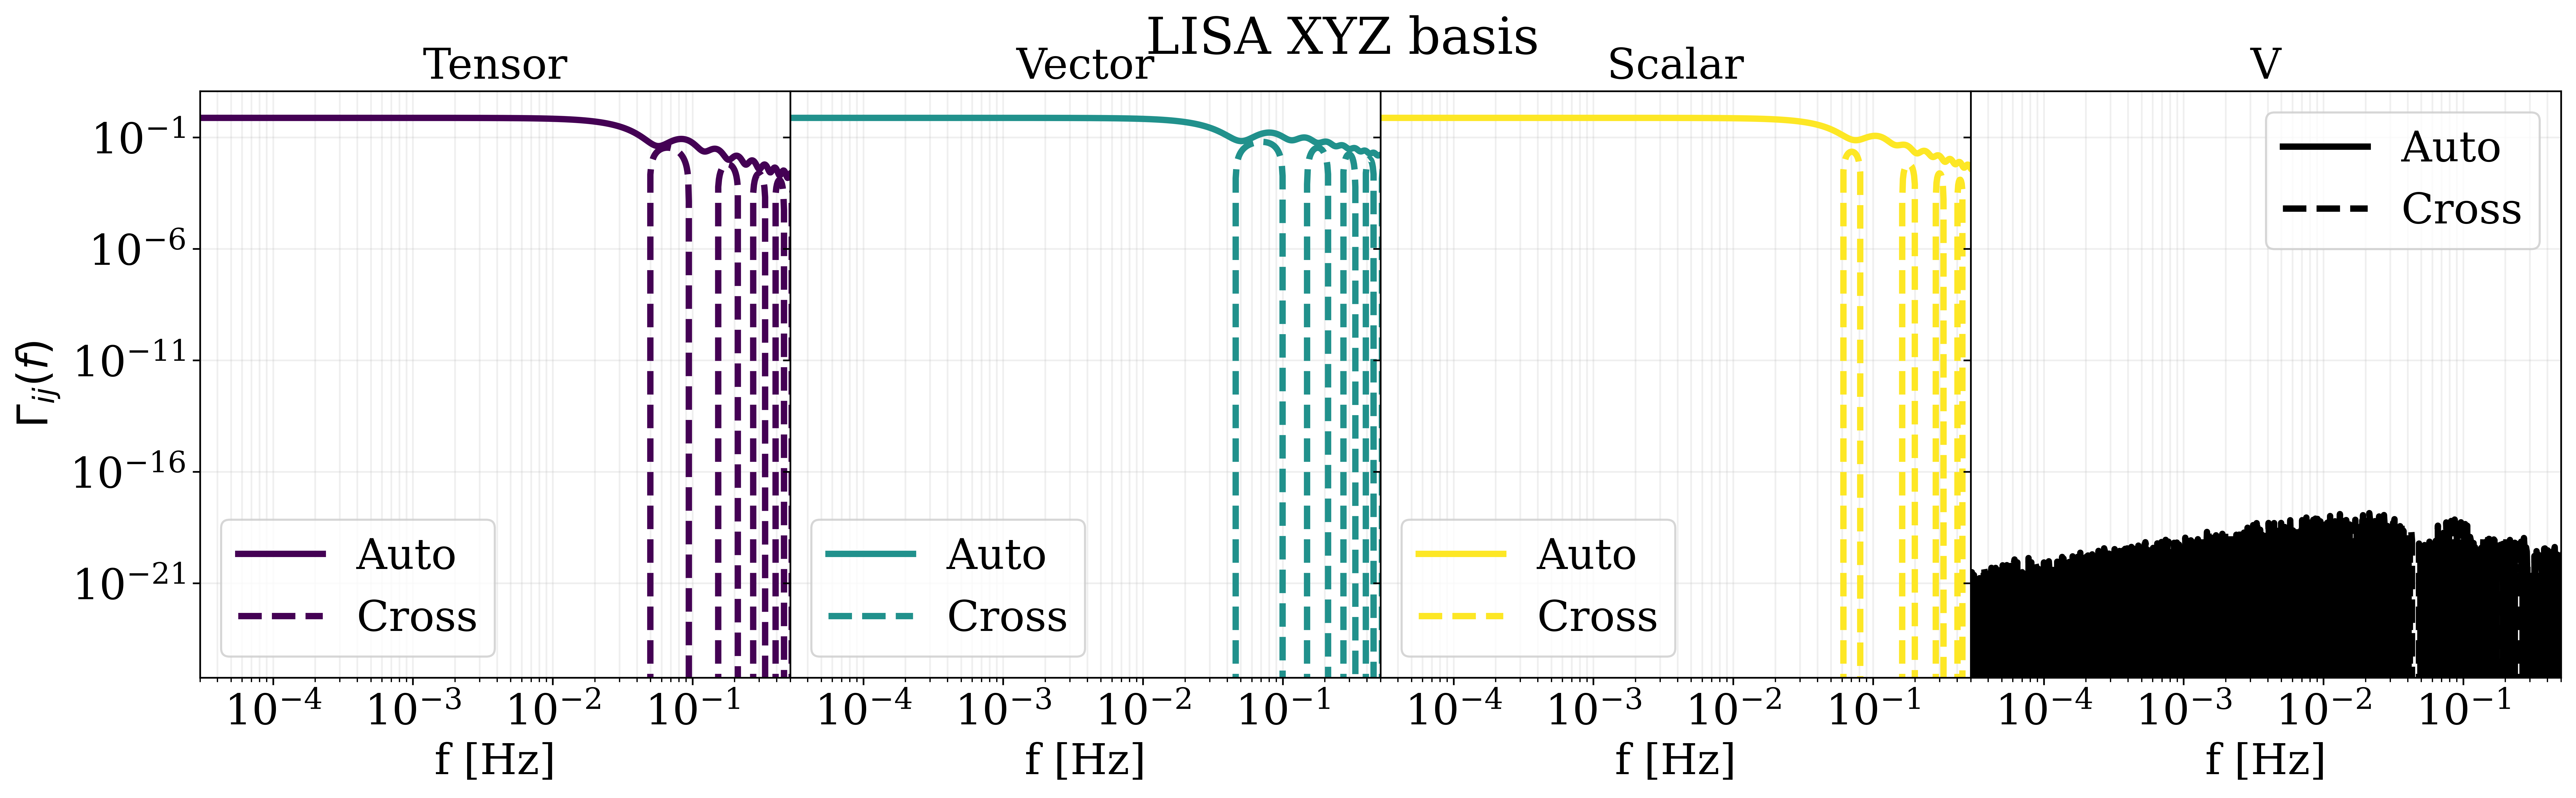

In [4]:
colors = cm.viridis(np.linspace(0, 1, 3))

# Crea la figura e gli assi
fig, axs = plt.subplots(1, 4, sharey=True, figsize=(20, 5), gridspec_kw={'wspace': 0})

# Plot per il tensor
axs[0].plot(f, R_auto_t, label='Auto', color=colors[0])
axs[0].plot(f, R_cross_t, label='Cross', color=colors[0], linestyle='--')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_xlabel('f [Hz]')
axs[0].set_ylabel(r'$\Gamma_{ij}(f)$')
axs[0].legend()
axs[0].grid(alpha=0.2, which='both')
axs[0].set_xlim(3e-5, 5e-1)
axs[0].set_title('Tensor')

# Plot per il vector
axs[1].plot(f, R_auto_v, label='Auto', color=colors[1])
axs[1].plot(f, R_cross_v, label='Cross', color=colors[1], linestyle='--')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_xlabel('f [Hz]')
axs[1].legend()
axs[1].grid(alpha=0.2, which='both')
axs[1].set_xlim(3e-5, 5e-1)
axs[1].set_title('Vector')

# Plot per il scalar
axs[2].plot(f, R_auto_s, label='Auto', color=colors[2])
axs[2].plot(f, R_cross_s, label='Cross', color=colors[2], linestyle='--')
axs[2].set_xscale('log')
axs[2].set_yscale('log')
axs[2].set_xlabel('f [Hz]')
axs[2].legend()
axs[2].grid(alpha=0.2, which='both')
axs[2].set_xlim(3e-5, 5e-1)
axs[2].set_title('Scalar')

# Plot per il V
axs[3].plot(f, R_auto_V, label='Auto', color='k')
axs[3].plot(f, R_cross_V, label='Cross', color='k', linestyle='--')
axs[3].set_xscale('log')
axs[3].set_yscale('log')
axs[3].set_xlabel('f [Hz]')
axs[3].legend()
axs[3].grid(alpha=0.2, which='both')
axs[3].set_xlim(3e-5, 5e-1)
axs[3].set_title('V')

# Imposta il titolo principale
fig.suptitle('LISA XYZ basis')

plt.show()

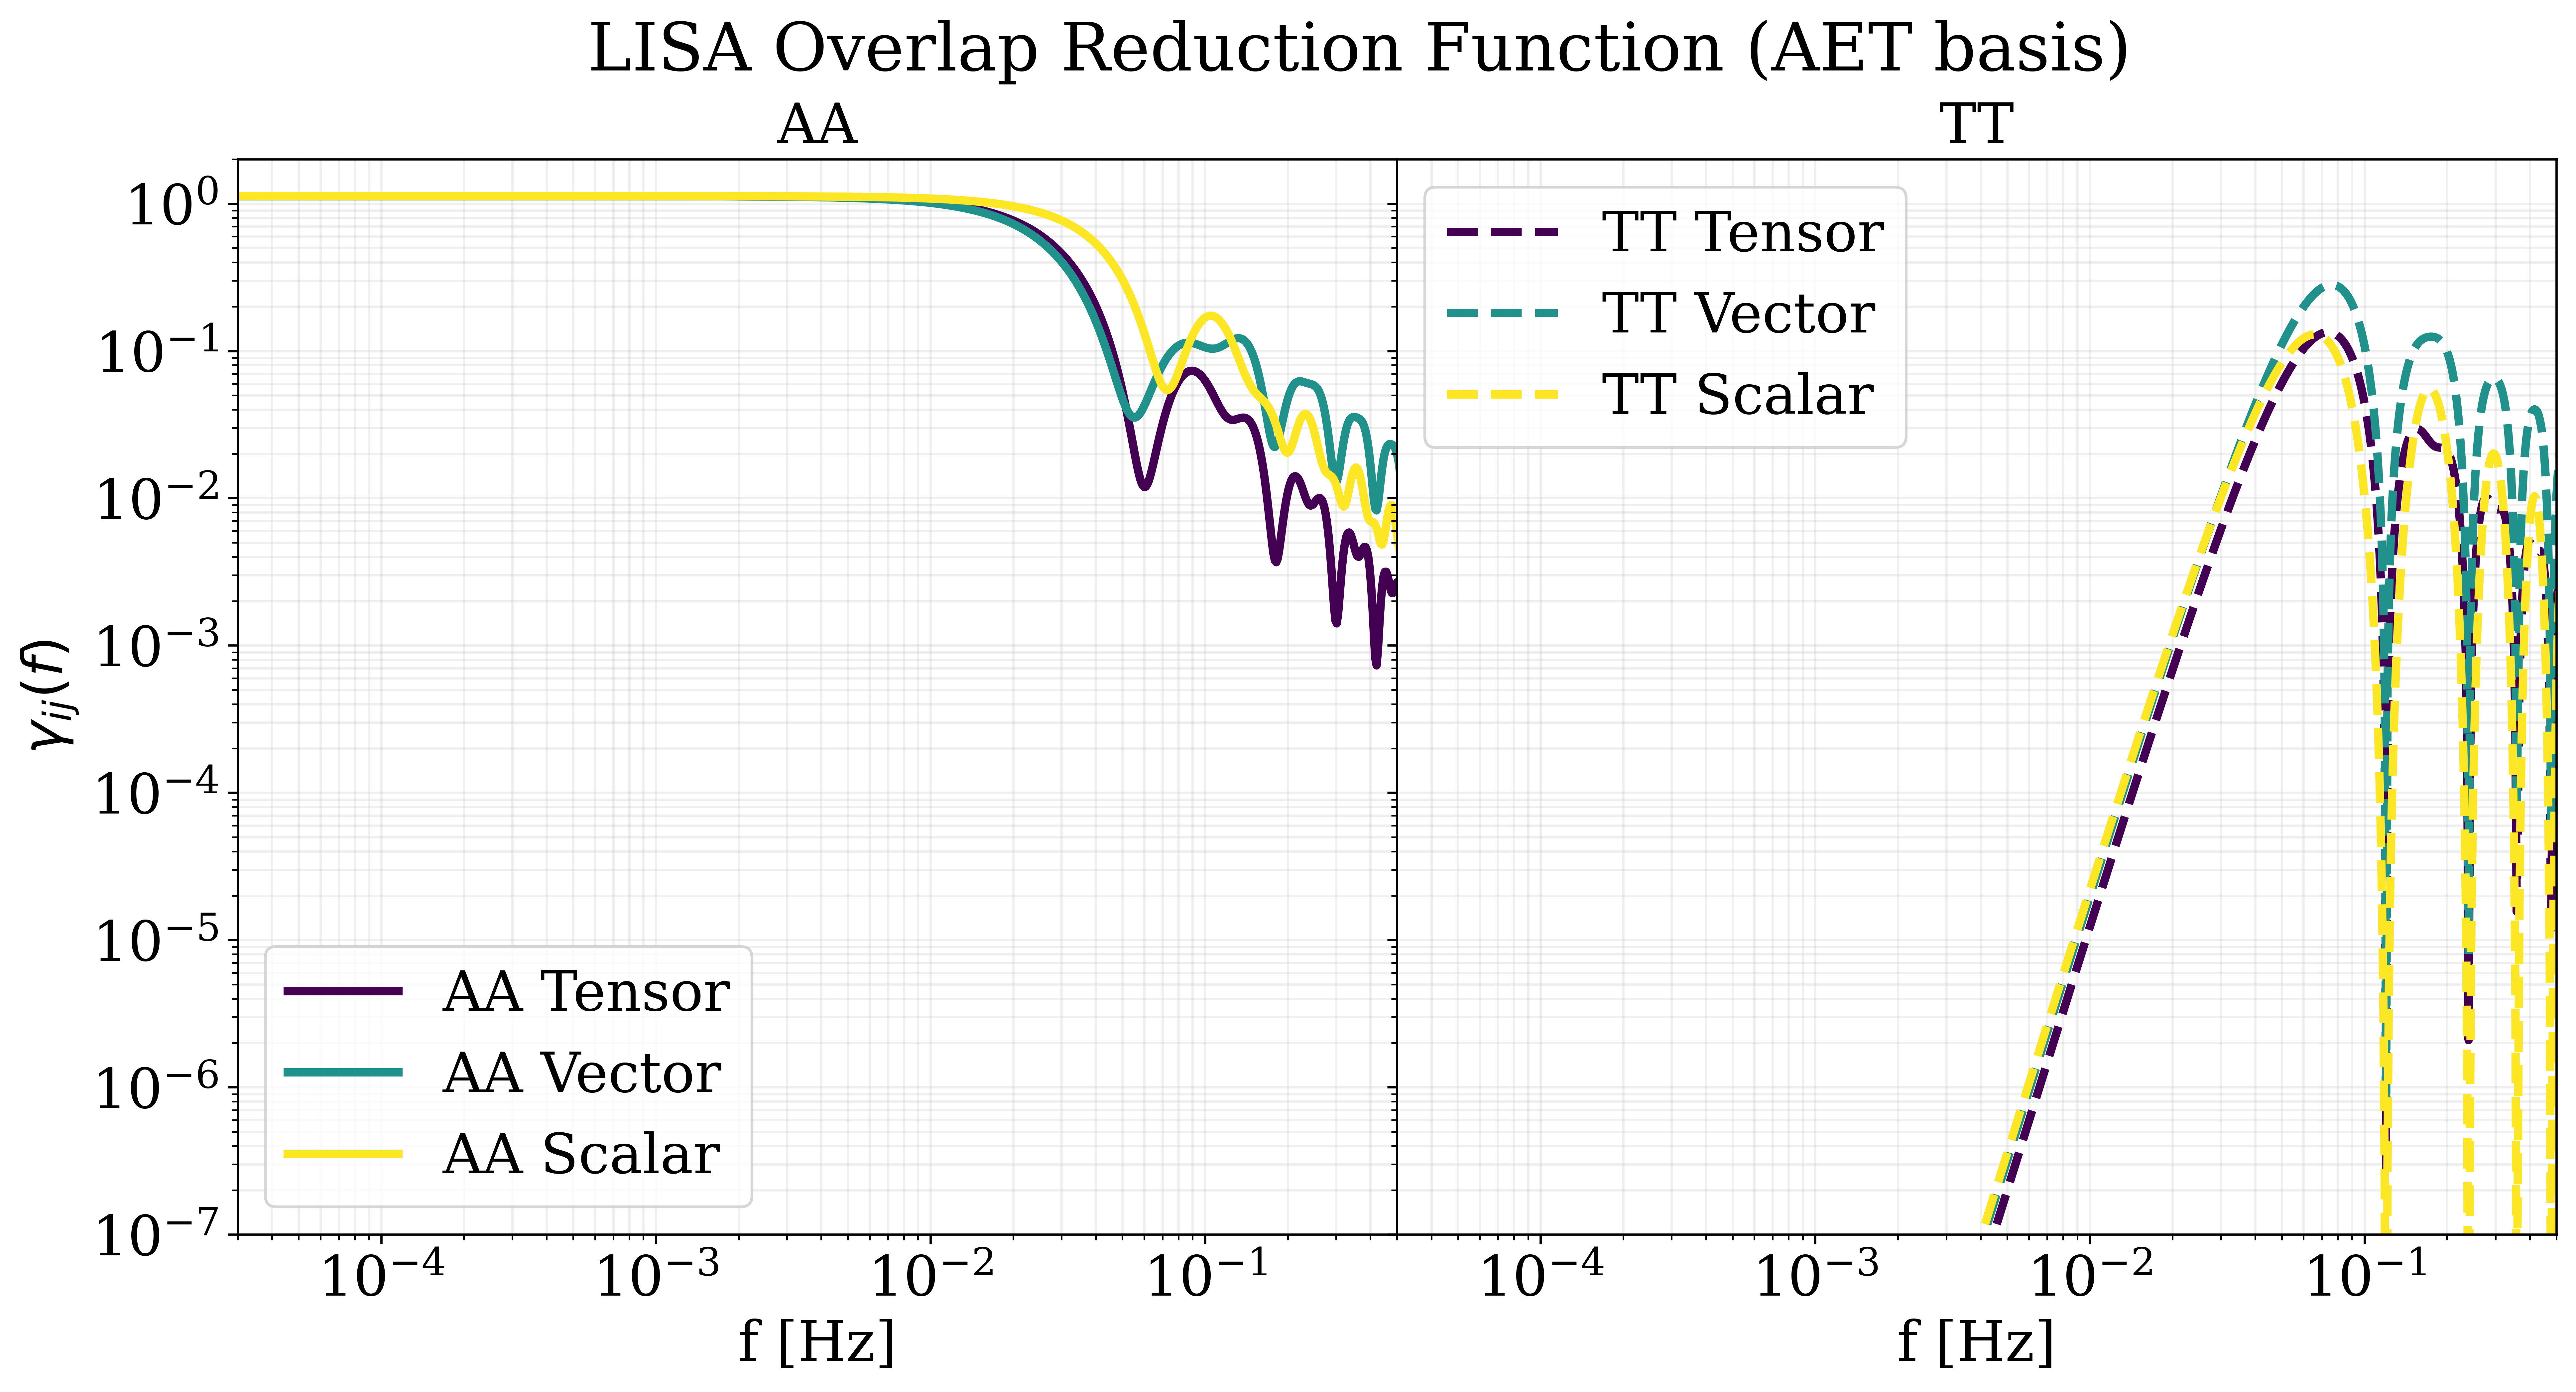

In [33]:
# AET basis
f = np.logspace(-5, 0, 1000)
R_AA_t = Response.overlap('LISA A', 'LISA A', f, 0, 't')
R_AA_v = Response.overlap('LISA A', 'LISA A', f, 0, 'v')
R_AA_s = Response.overlap('LISA A', 'LISA A', f, 0, 's')
R_AA_V = Response.overlap('LISA A', 'LISA A', f, 0, 'V')

R_TT_t = Response.overlap('LISA T', 'LISA T', f, 0, 't')
R_TT_v = Response.overlap('LISA T', 'LISA T', f, 0, 'v')
R_TT_s = Response.overlap('LISA T', 'LISA T', f, 0, 's')
R_TT_V = Response.overlap('LISA T', 'LISA T', f, 0, 'V')

colors = cm.viridis(np.linspace(0, 1, 3))

# Crea la figura e gli assi
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(15, 7), gridspec_kw={'wspace': 0})

# Plot per le serie AA
axs[0].plot(f, R_AA_t, label='AA Tensor', color=colors[0], rasterized=True)
axs[0].plot(f, R_AA_v, label='AA Vector', color=colors[1], rasterized=True)
axs[0].plot(f, R_AA_s, label='AA Scalar', color=colors[2], rasterized=True)
#axs[0].plot(f, R_AA_V, label='AA V', color='k', linestyle='--', rasterized=True)
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_xlabel('f [Hz]')
axs[0].set_ylabel(r'$\gamma_{ij}(f)$')
axs[0].set_xlim(3e-5, 5e-1)
axs[0].set_ylim(1e-7, 2)
axs[0].legend(loc='lower left')
axs[0].grid(alpha=0.2, which='both')
axs[0].set_title('AA')

# Plot per le serie TT
axs[1].plot(f, R_TT_t, label='TT Tensor', color=colors[0], linestyle='--', rasterized=True)
axs[1].plot(f, R_TT_v, label='TT Vector', color=colors[1], linestyle='--', rasterized=True)
axs[1].plot(f, R_TT_s, label='TT Scalar', color=colors[2], linestyle='--', rasterized=True)
#axs[1].plot(f, R_TT_V, label='TT V', color='k', linestyle=':', rasterized=True)
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_xlabel('f [Hz]')
axs[1].legend()
axs[1].set_xlim(3e-5, 5e-1)
axs[1].grid(alpha=0.2, which='both')
axs[1].set_title('TT')

# Imposta il titolo principale
fig.suptitle('LISA Overlap Reduction Function (AET basis)')

plt.show()


* Power Law Integrated Sensitivity curve

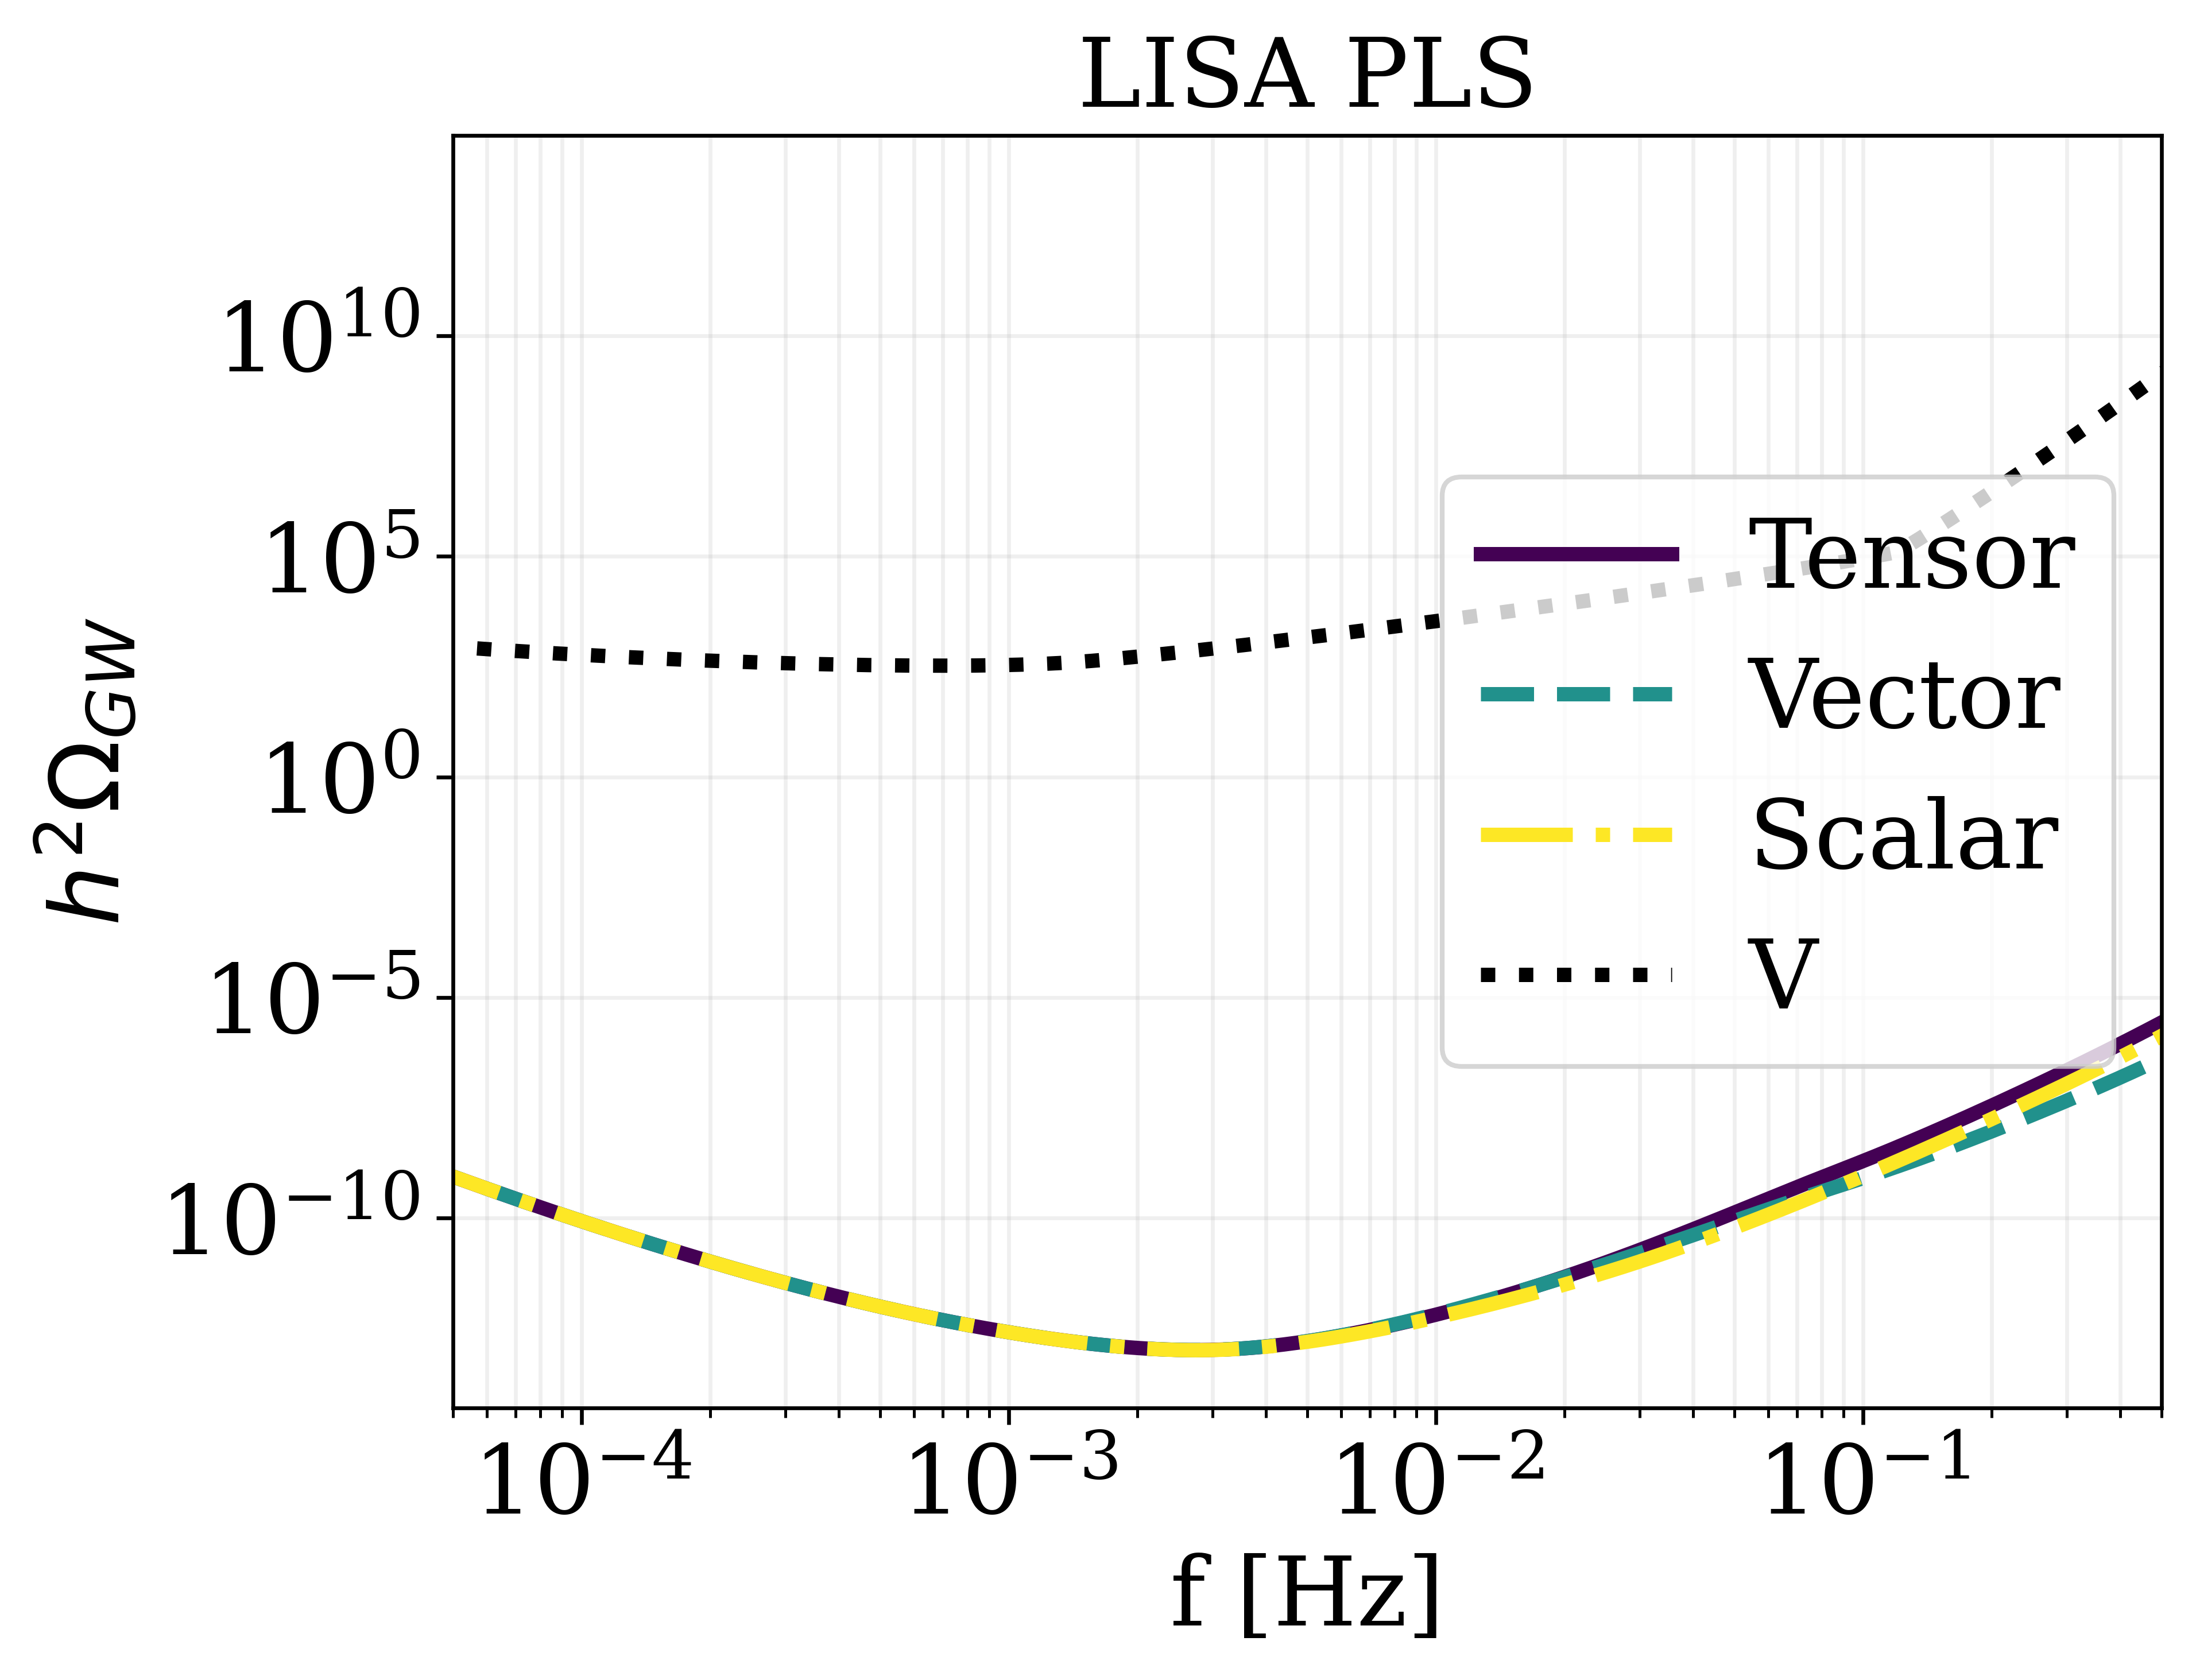

In [7]:
fref = 1e-2
snr = 10
Tobs = 3

pls_t = pls.PLS('LISA', 'Network', f, fref, 't', snr, Tobs, 0)
pls_v = pls.PLS('LISA', 'Network', f, fref, 'v', snr, Tobs, 0)
pls_s = pls.PLS('LISA', 'Network', f, fref, 's', snr, Tobs,  0)
pls_V = pls.PLS('LISA', 'Network', f, fref, 'V', snr, Tobs, 0)

idx_min_t = np.argmin(pls_t)
idx_min_v = np.argmin(pls_v)
idx_min_s = np.argmin(pls_s)
idx_min_V = np.argmin(pls_V)


print("Min pls_t:", pls_t[idx_min_t], "f min:", f[idx_min_t])
print("Min pls_v:", pls_v[idx_min_v], "f min:", f[idx_min_v])
print("Min pls_s:", pls_s[idx_min_s], "f min:", f[idx_min_s])
print("Min pls_V:", pls_V[idx_min_V], "f min:", f[idx_min_V])

colors = plt.cm.viridis(np.linspace(0, 1, 3))

plt.plot(f, pls_t, label='Tensor', color=colors[0])
plt.plot(f, pls_v, label='Vector', color=colors[1], linestyle='--')
plt.plot(f, pls_s, label='Scalar', color=colors[2], linestyle='-.')
plt.plot(f, pls_V, label='V', color='k', linestyle=':', rasterized=True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$h^2\Omega_{GW}$')
plt.xlim(5e-5, 5e-1)
plt.grid(alpha=0.2, which='both')
plt.title(r'LISA PLS')
plt.legend()

* Angular Response

In [34]:
print('Calculating l = 0 ...')

print(' * AA')

print('   - tensor')
R0_AA_t = AngularResponse.R_ell(0, 'LISA A', 'LISA A', f, 't', 0)
print('   - vector')
R0_AA_v = AngularResponse.R_ell(0, 'LISA A', 'LISA A', f, 'v', 0)
print('   - scalar')
R0_AA_s = AngularResponse.R_ell(0, 'LISA A', 'LISA A', f, 's', 0)
print('   - V')
R0_AA_V = AngularResponse.R_ell(0, 'LISA A', 'LISA A', f, 'V', 0)

print(' * TT')
print('   - tensor')
R0_TT_t = AngularResponse.R_ell(0, 'LISA T', 'LISA T', f, 't', 0)
print('   - vector')
R0_TT_v = AngularResponse.R_ell(0, 'LISA T', 'LISA T', f, 'v', 0)
print('   - scalar')
R0_TT_s = AngularResponse.R_ell(0, 'LISA T', 'LISA T', f, 's', 0)
print('   - V')
R0_TT_V = AngularResponse.R_ell(0, 'LISA T', 'LISA T', f, 'V', 0)


print('Calculating l = 1 ...')

print(' * AE')
print('   - tensor')
R1_AE_t = AngularResponse.R_ell(1, 'LISA A', 'LISA E', f, 't', 0)
print('   - vector')
R1_AE_v = AngularResponse.R_ell(1, 'LISA A', 'LISA E', f, 'v', 0)
print('   - scalar')
R1_AE_s = AngularResponse.R_ell(1, 'LISA A', 'LISA E', f, 's', 0)
print('   - V')
R1_AE_V = AngularResponse.R_ell(1, 'LISA A', 'LISA E', f, 'V', 0)


print(' * AT')
print('   - tensor')
R1_AT_t = AngularResponse.R_ell(1, 'LISA A', 'LISA T', f, 't', 0)
print('   - vector')
R1_AT_v = AngularResponse.R_ell(1, 'LISA A', 'LISA T', f, 'v', 0)
print('   - scalar')
R1_AT_s = AngularResponse.R_ell(1, 'LISA A', 'LISA T', f, 's', 0)
print('   - V')
R1_AT_V = AngularResponse.R_ell(1, 'LISA A', 'LISA T', f, 'V', 0)

print('Calculating l = 2 ...')  

print(' * AA')
print('   - tensor')
R2_AA_t = AngularResponse.R_ell(2, 'LISA A', 'LISA A', f, 't', 0)
print('   - vector')
R2_AA_v = AngularResponse.R_ell(2, 'LISA A', 'LISA A', f, 'v', 0)
print('   - scalar')
R2_AA_s = AngularResponse.R_ell(2, 'LISA A', 'LISA A', f, 's', 0)
print('   - V')
R2_AA_V = AngularResponse.R_ell(2, 'LISA A', 'LISA A', f, 'V', 0)

print(' * TT')
print('   - tensor')
R2_TT_t = AngularResponse.R_ell(2, 'LISA T', 'LISA T', f, 't', 0)
print('   - vector')
R2_TT_v = AngularResponse.R_ell(2, 'LISA T', 'LISA T', f, 'v', 0)
print('   - scalar')
R2_TT_s = AngularResponse.R_ell(2, 'LISA T', 'LISA T', f, 's', 0)
print('   - V')
R2_TT_V = AngularResponse.R_ell(2, 'LISA T', 'LISA T', f, 'V', 0)

print(' * AE')
print('   - tensor')
R2_AE_t = AngularResponse.R_ell(2, 'LISA A', 'LISA E', f, 't', 0)
print('   - vector')
R2_AE_v = AngularResponse.R_ell(2, 'LISA A', 'LISA E', f, 'v', 0)
print('   - scalar')
R2_AE_s = AngularResponse.R_ell(2, 'LISA A', 'LISA E', f, 's', 0)
print('   - V')
R2_AE_V = AngularResponse.R_ell(2, 'LISA A', 'LISA E', f, 'V', 0)

print(' * AT')
print('   - tensor')
R2_AT_t = AngularResponse.R_ell(2, 'LISA A', 'LISA T', f, 't', 0)
print('   - vector')
R2_AT_v = AngularResponse.R_ell(2, 'LISA A', 'LISA T', f, 'v', 0)
print('   - scalar')
R2_AT_s = AngularResponse.R_ell(2, 'LISA A', 'LISA T', f, 's', 0)
print('   - V')
R2_AT_V = AngularResponse.R_ell(2, 'LISA A', 'LISA T', f, 'V', 0)

print('Calculating l = 3 ...')

print(' * AE')
print('   - tensor')
R3_AE_t = AngularResponse.R_ell(3, 'LISA A', 'LISA E', f, 't', 0)
print('   - vector')
R3_AE_v = AngularResponse.R_ell(3, 'LISA A', 'LISA E', f, 'v', 0)
print('   - scalar')
R3_AE_s = AngularResponse.R_ell(3, 'LISA A', 'LISA E', f, 's', 0)
print('   - V')
R3_AE_V = AngularResponse.R_ell(3, 'LISA A', 'LISA E', f, 'V', 0)

print(' * AT')
print('   - tensor')
R3_AT_t = AngularResponse.R_ell(3, 'LISA A', 'LISA T', f, 't', 0)
print('   - vector')
R3_AT_v = AngularResponse.R_ell(3, 'LISA A', 'LISA T', f, 'v', 0)
print('   - scalar')
R3_AT_s = AngularResponse.R_ell(3, 'LISA A', 'LISA T', f, 's', 0)
print('   - V')
R3_AT_V = AngularResponse.R_ell(3, 'LISA A', 'LISA T', f, 'V', 0)



Calculating l = 0 ...
 * AA
   - tensor
   - vector
   - scalar
   - V
 * TT
   - tensor
   - vector
   - scalar
   - V
Calculating l = 1 ...
 * AE
   - tensor
   - vector
   - scalar
   - V
 * AT
   - tensor
   - vector
   - scalar
   - V
Calculating l = 2 ...
 * AA
   - tensor
   - vector
   - scalar
   - V
 * TT
   - tensor
   - vector
   - scalar
   - V
 * AE
   - tensor
   - vector
   - scalar
   - V
 * AT
   - tensor
   - vector
   - scalar
   - V
Calculating l = 3 ...
 * AE
   - tensor
   - vector
   - scalar
   - V
 * AT
   - tensor
   - vector
   - scalar
   - V


In [35]:
colors = cm.viridis(np.linspace(0, 1, 3))

fig, axs = plt.subplots(2, 2, figsize=(16, 14), gridspec_kw={'wspace': 0.2, 'hspace': 0.3})

axs[0,0].loglog(f, R0_AA_t, label=r'$\ell=0$ tensor', color=colors[0], rasterized=True)
axs[0,0].loglog(f, R0_AA_v, label=r'$\ell=0$ vector', color=colors[1], rasterized=True)
axs[0,0].loglog(f, R0_AA_s, label=r'$\ell=0$ scalar', color=colors[2], rasterized=True)
axs[0,0].loglog(f, R0_AA_V,  color='k', rasterized=True)

axs[0,0].loglog(f, R2_AA_t, label=r'$\ell=2$ tensor', color=colors[0], linestyle = '--', rasterized=True)
axs[0,0].loglog(f, R2_AA_v, label=r'$\ell=2$ vector', color=colors[1], linestyle = '--', rasterized=True)
axs[0,0].loglog(f, R2_AA_s, label=r'$\ell=2$ scalar', color=colors[2], linestyle = '--', rasterized=True)
axs[0,0].loglog(f, R2_AA_V, label=r'$\ell=2$ V', color='k', linestyle='--', rasterized=True)

axs[0,0].set_xlabel('f [Hz]')
axs[0,0].set_ylabel(r'$R_{\ell}$')
#axs[0,0].set_ylim(1e-7, 1.5)
axs[0,0].set_xlim(1e-5, 5e-1)
axs[0,0].legend()
axs[0,0].grid(alpha=0.2, which='both')
axs[0,0].set_title(r'$AA$')

axs[0,1].loglog(f, R0_TT_t, label='tensor', color=colors[0], rasterized=True)
axs[0,1].loglog(f, R0_TT_v, label='vector', color=colors[1], rasterized=True)
axs[0,1].loglog(f, R0_TT_s, label='scalar', color=colors[2], rasterized=True)
axs[0,1].loglog(f, R0_TT_V, label='V', color='k', rasterized=True)

axs[0,1].loglog(f, R2_TT_t, label='tensor', color=colors[0], linestyle = '--', rasterized=True)
axs[0,1].loglog(f, R2_TT_v, label='vector', color=colors[1], linestyle = '--', rasterized=True)
axs[0,1].loglog(f, R2_TT_s, label='scalar', color=colors[2], linestyle = '--', rasterized=True)
axs[0,1].loglog(f, R2_TT_V, label='V', color='k', linestyle='--', rasterized=True)
axs[0,1].set_xlabel('f [Hz]')
#axs[0,1].set_ylim(1e-7, 1)
axs[0,1].set_xlim(1e-2, 5e-1)
axs[0,1].grid(alpha=0.2, which='both')
axs[0,1].set_title(r'$TT$')

axs[1,0].loglog(f, R2_AE_t, label='tensor', color=colors[0], linestyle = '--', rasterized=True)
axs[1,0].loglog(f, R2_AE_v, label='vector', color=colors[1], linestyle = '--', rasterized=True)
axs[1,0].loglog(f, R2_AE_s, label='scalar', color=colors[2], linestyle = '--', rasterized=True)
axs[1,0].loglog(f, R2_AE_V, label='V', color='k', linestyle ='--', rasterized=True)
axs[1,0].set_xlabel('f [Hz]')
axs[1,0].set_ylabel(r'$R_{\ell}$')
#axs[1,0].set_xlim(1e-5, 5e-1)
axs[1,0].grid(alpha=0.2, which='both')
axs[1,0].set_title(r'$AE$')

axs[1,1].loglog(f, R2_AT_t, label='tensor', color=colors[0], linestyle = '--', rasterized=True)
axs[1,1].loglog(f, R2_AT_v, label='vector', color=colors[1], linestyle = '--', rasterized=True)
axs[1,1].loglog(f, R2_AT_s, label='scalar', color=colors[2], linestyle = '--', rasterized=True)
axs[1,1].loglog(f, R2_AT_V, label='V', color='k', linestyle = '--', rasterized=True)
axs[1,1].set_xlabel('f [Hz]')
#axs[1,1].set_ylim(1e-7, 1)
axs[1,1].set_xlim(1e-3, 5e-1)
axs[1,1].grid(alpha=0.2, which='both')
axs[1,1].set_title(r'$AT$')

fig.suptitle(r'LISA Angular Response (even multipoles)')


Text(0.5, 0.98, 'LISA Angular Response (even multipoles)')

Text(0.5, 0.98, 'LISA Angular Response (odd multipoles)')

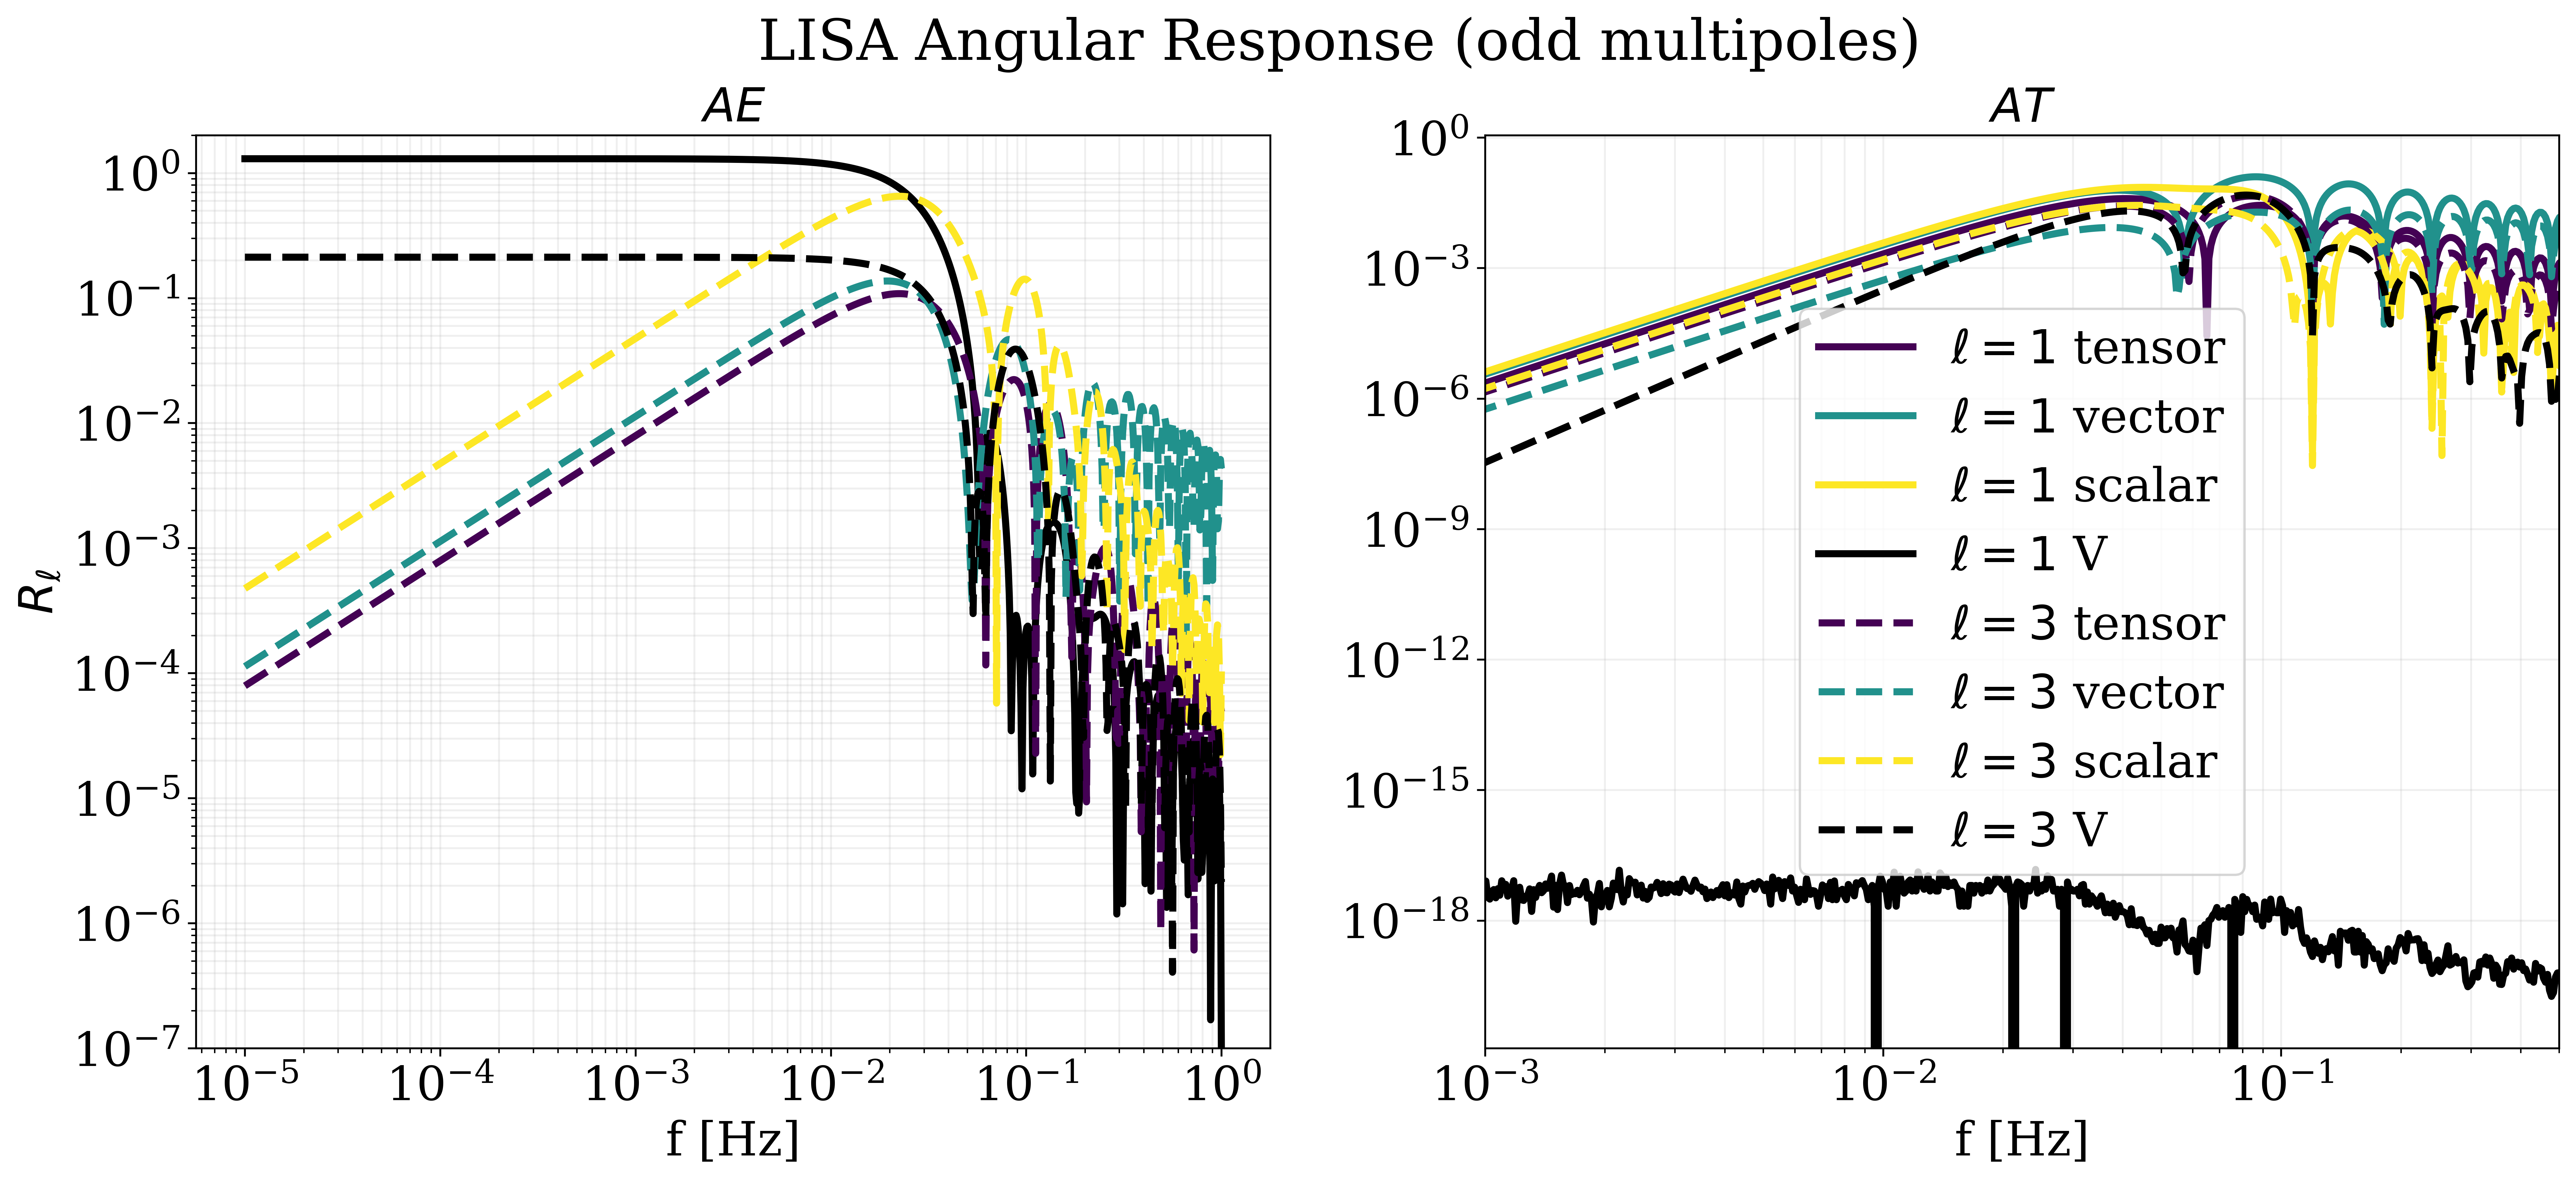

In [36]:
fig, axs = plt.subplots(1, 2, figsize=(18, 7),  gridspec_kw={'wspace': 0.2, 'hspace': 0.1})


axs[0].loglog(f, R1_AE_t, label=r'$\ell=1$ tensor', color=colors[0], rasterized=True)
axs[0].loglog(f, R1_AE_v, label=r'$\ell=1$ vector', color=colors[1], rasterized=True)
axs[0].loglog(f, R1_AE_s, label=r'$\ell=1$ scalar', color=colors[2], rasterized=True)
axs[0].loglog(f, R1_AE_V, label=r'$\ell=1$ V', color='k', rasterized=True)
axs[0].loglog(f, R3_AE_t, label=r'$\ell=1$ tensor', color=colors[0], linestyle = '--', rasterized=True)
axs[0].loglog(f, R3_AE_v, label=r'$\ell=1$ vector', color=colors[1], linestyle = '--', rasterized=True)
axs[0].loglog(f, R3_AE_s, label=r'$\ell=1$ scalar', color=colors[2], linestyle = '--', rasterized=True)
axs[0].loglog(f, R3_AE_V, label=r'$\ell=1$ V', color='k', linestyle='--', rasterized=True)
axs[0].set_xlabel('f [Hz]')
axs[0].set_ylabel(r'$R_{\ell}$')
axs[0].grid(alpha=0.2, which='both')
#axs[0].set_xlim(5e-5, 5e-1)
axs[0].set_ylim(1e-7, 2)
axs[0].set_title(r'$AE$')

axs[1].loglog(f, R1_AT_t, label=r'$\ell=1$ tensor', color=colors[0], rasterized=True)
axs[1].loglog(f, R1_AT_v, label=r'$\ell=1$ vector', color=colors[1], rasterized=True)
axs[1].loglog(f, R1_AT_s, label=r'$\ell=1$ scalar', color=colors[2], rasterized=True)
axs[1].loglog(f, R1_AT_V, label=r'$\ell=1$ V', color='k', rasterized=True)
axs[1].loglog(f, R3_AT_t, label=r'$\ell=3$ tensor', color=colors[0], linestyle = '--', rasterized=True)
axs[1].loglog(f, R3_AT_v, label=r'$\ell=3$ vector', color=colors[1], linestyle = '--', rasterized=True)
axs[1].loglog(f, R3_AT_s, label=r'$\ell=3$ scalar', color=colors[2], linestyle = '--', rasterized=True)
axs[1].loglog(f, R3_AT_V, label=r'$\ell=3$ V', color='k', linestyle='--', rasterized=True)
axs[1].set_xlabel('f [Hz]')
axs[1].set_xlim(1e-3, 5e-1)
#axs[1].set_ylim(1e-7, 1)
axs[1].legend()
axs[1].grid(alpha=0.2, which='both')
axs[1].set_title(r'$AT$')

fig.suptitle(r'LISA Angular Response (odd multipoles)')

* Angular Sensitivity

Min pls_0_t: 1.0212188267851492e-13 f min: 0.0027380251779278576
Min pls_1_t: 2.4891032849172874e-09 f min: 0.006064329395408062
Min pls_2_t: 5.059651661776975e-12 f min: 0.0027380251779278576
Min pls_3_t: 1.9573875446314613e-10 f min: 0.004005000757873611


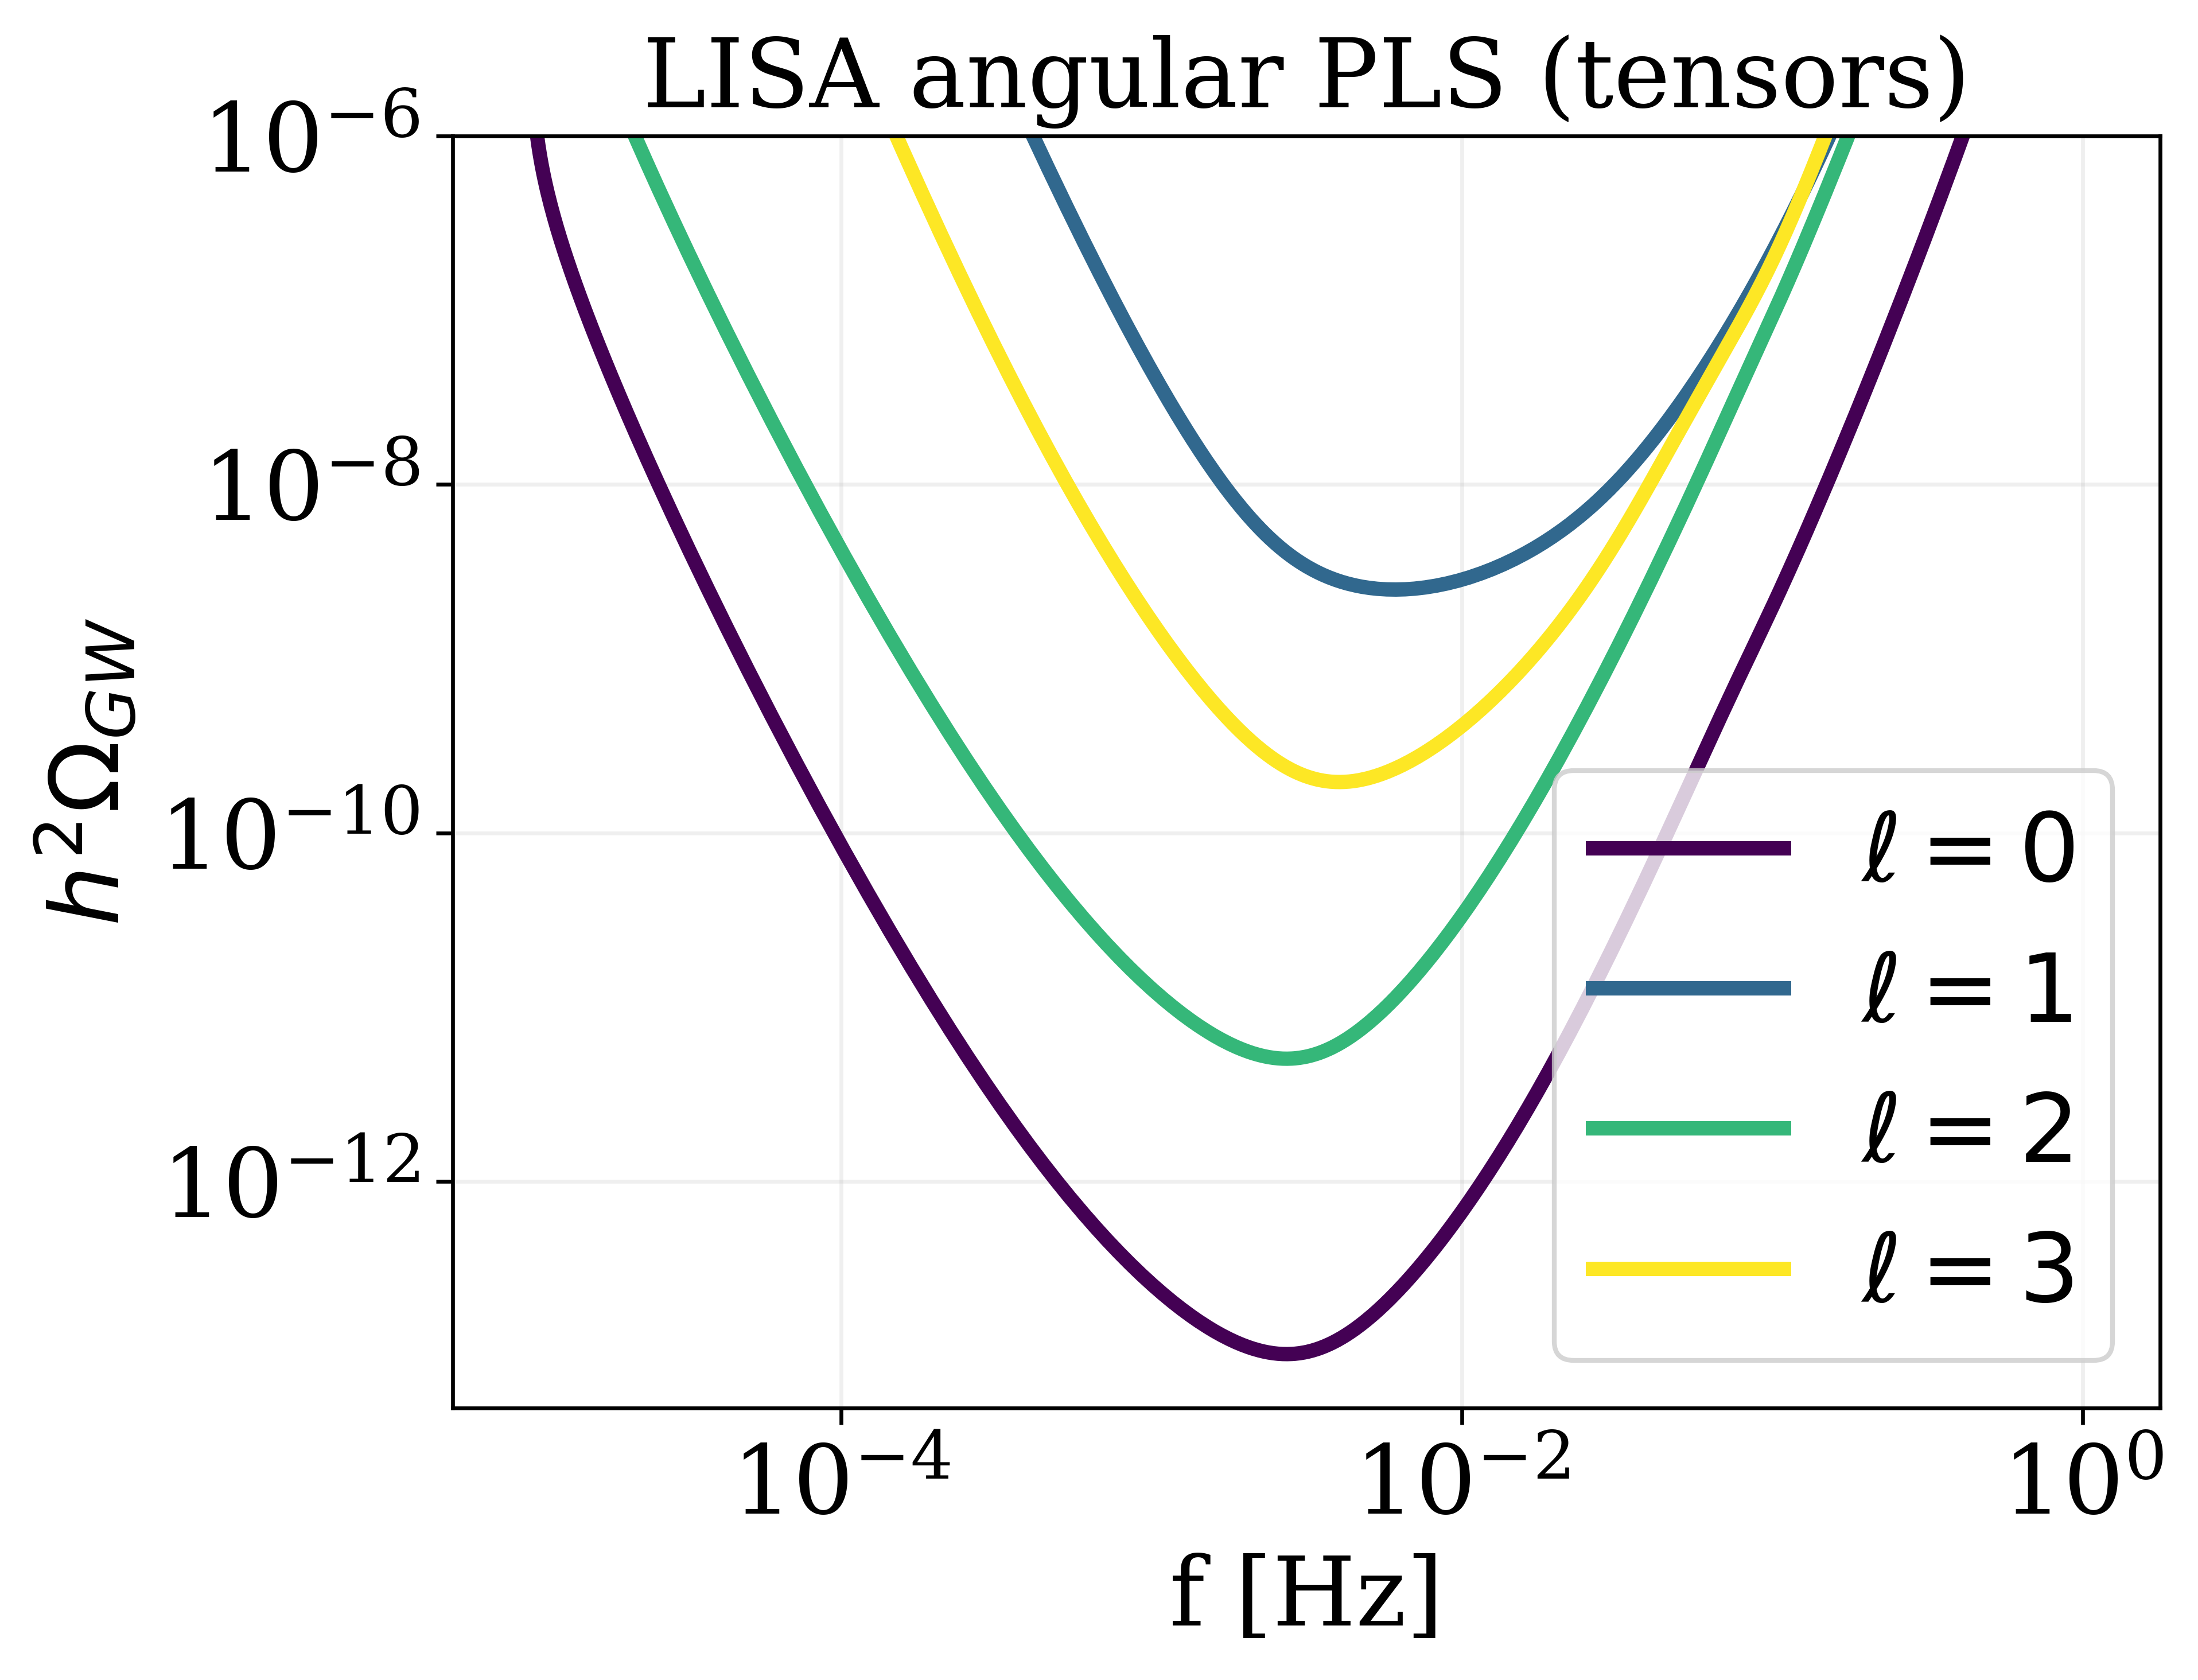

In [41]:
f = np.logspace(-5, 0, 1000)
fref = 1e-2
snr = 10
Tobs = 3

# tensor

pls0_t = Sensitivity_ell.APLS_ell('LISA', 'Network', 0, f, 't', 0, fref, snr, Tobs, 1)
pls1_t = Sensitivity_ell.APLS_ell('LISA', 'Network', 1, f, 't', 0, fref, snr, Tobs,  1e-3)
pls2_t = Sensitivity_ell.APLS_ell('LISA', 'Network', 2, f, 't', 0, fref, snr, Tobs,  1e-3)
pls3_t = Sensitivity_ell.APLS_ell('LISA', 'Network', 3, f, 't', 0, fref, snr, Tobs,  1e-3)


idx_min_0_t = np.argmin(pls0_t)
idx_min_1_t = np.argmin(pls1_t)
idx_min_2_t = np.argmin(pls2_t)
idx_min_3_t = np.argmin(pls3_t)


print("Min pls_0_t:", pls0_t[idx_min_0_t], "f min:", f[idx_min_0_t])
print("Min pls_1_t:", pls1_t[idx_min_1_t], "f min:", f[idx_min_1_t])
print("Min pls_2_t:", pls2_t[idx_min_2_t], "f min:", f[idx_min_2_t])
print("Min pls_3_t:", pls3_t[idx_min_3_t], "f min:", f[idx_min_3_t])

colors = plt.cm.viridis(np.linspace(0, 1, 4))
plt.plot(f, pls0_t, label=r'$\ell=0$', color=colors[0], rasterized=True)
plt.plot(f, pls1_t, label=r'$\ell=1$', color=colors[1], rasterized=True)
plt.plot(f, pls2_t, label=r'$\ell=2$', color=colors[2], rasterized=True)
plt.plot(f, pls3_t, label=r'$\ell=3$', color=colors[3], rasterized=True)
#plt.plot(f, pls_t, label=r'$\ell=0$ tensor', color='red', linestyle='--', rasterized=True)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$h^2\Omega_{GW}$')
plt.title(r'LISA angular PLS (tensors)')
plt.ylim(5e-14, 1e-6)
plt.grid(alpha=0.2, which='both')
plt.legend()

Min pls_0_v: 1.0224585562171875e-13 f min: 0.0027066520700332413
Min pls_1_v: 1.5514008453725638e-09 f min: 0.006134621717992506
Min pls_2_v: 1.013262199605706e-11 f min: 0.0027066520700332413
Min pls_3_v: 1.3799591346355644e-10 f min: 0.004005000757873611


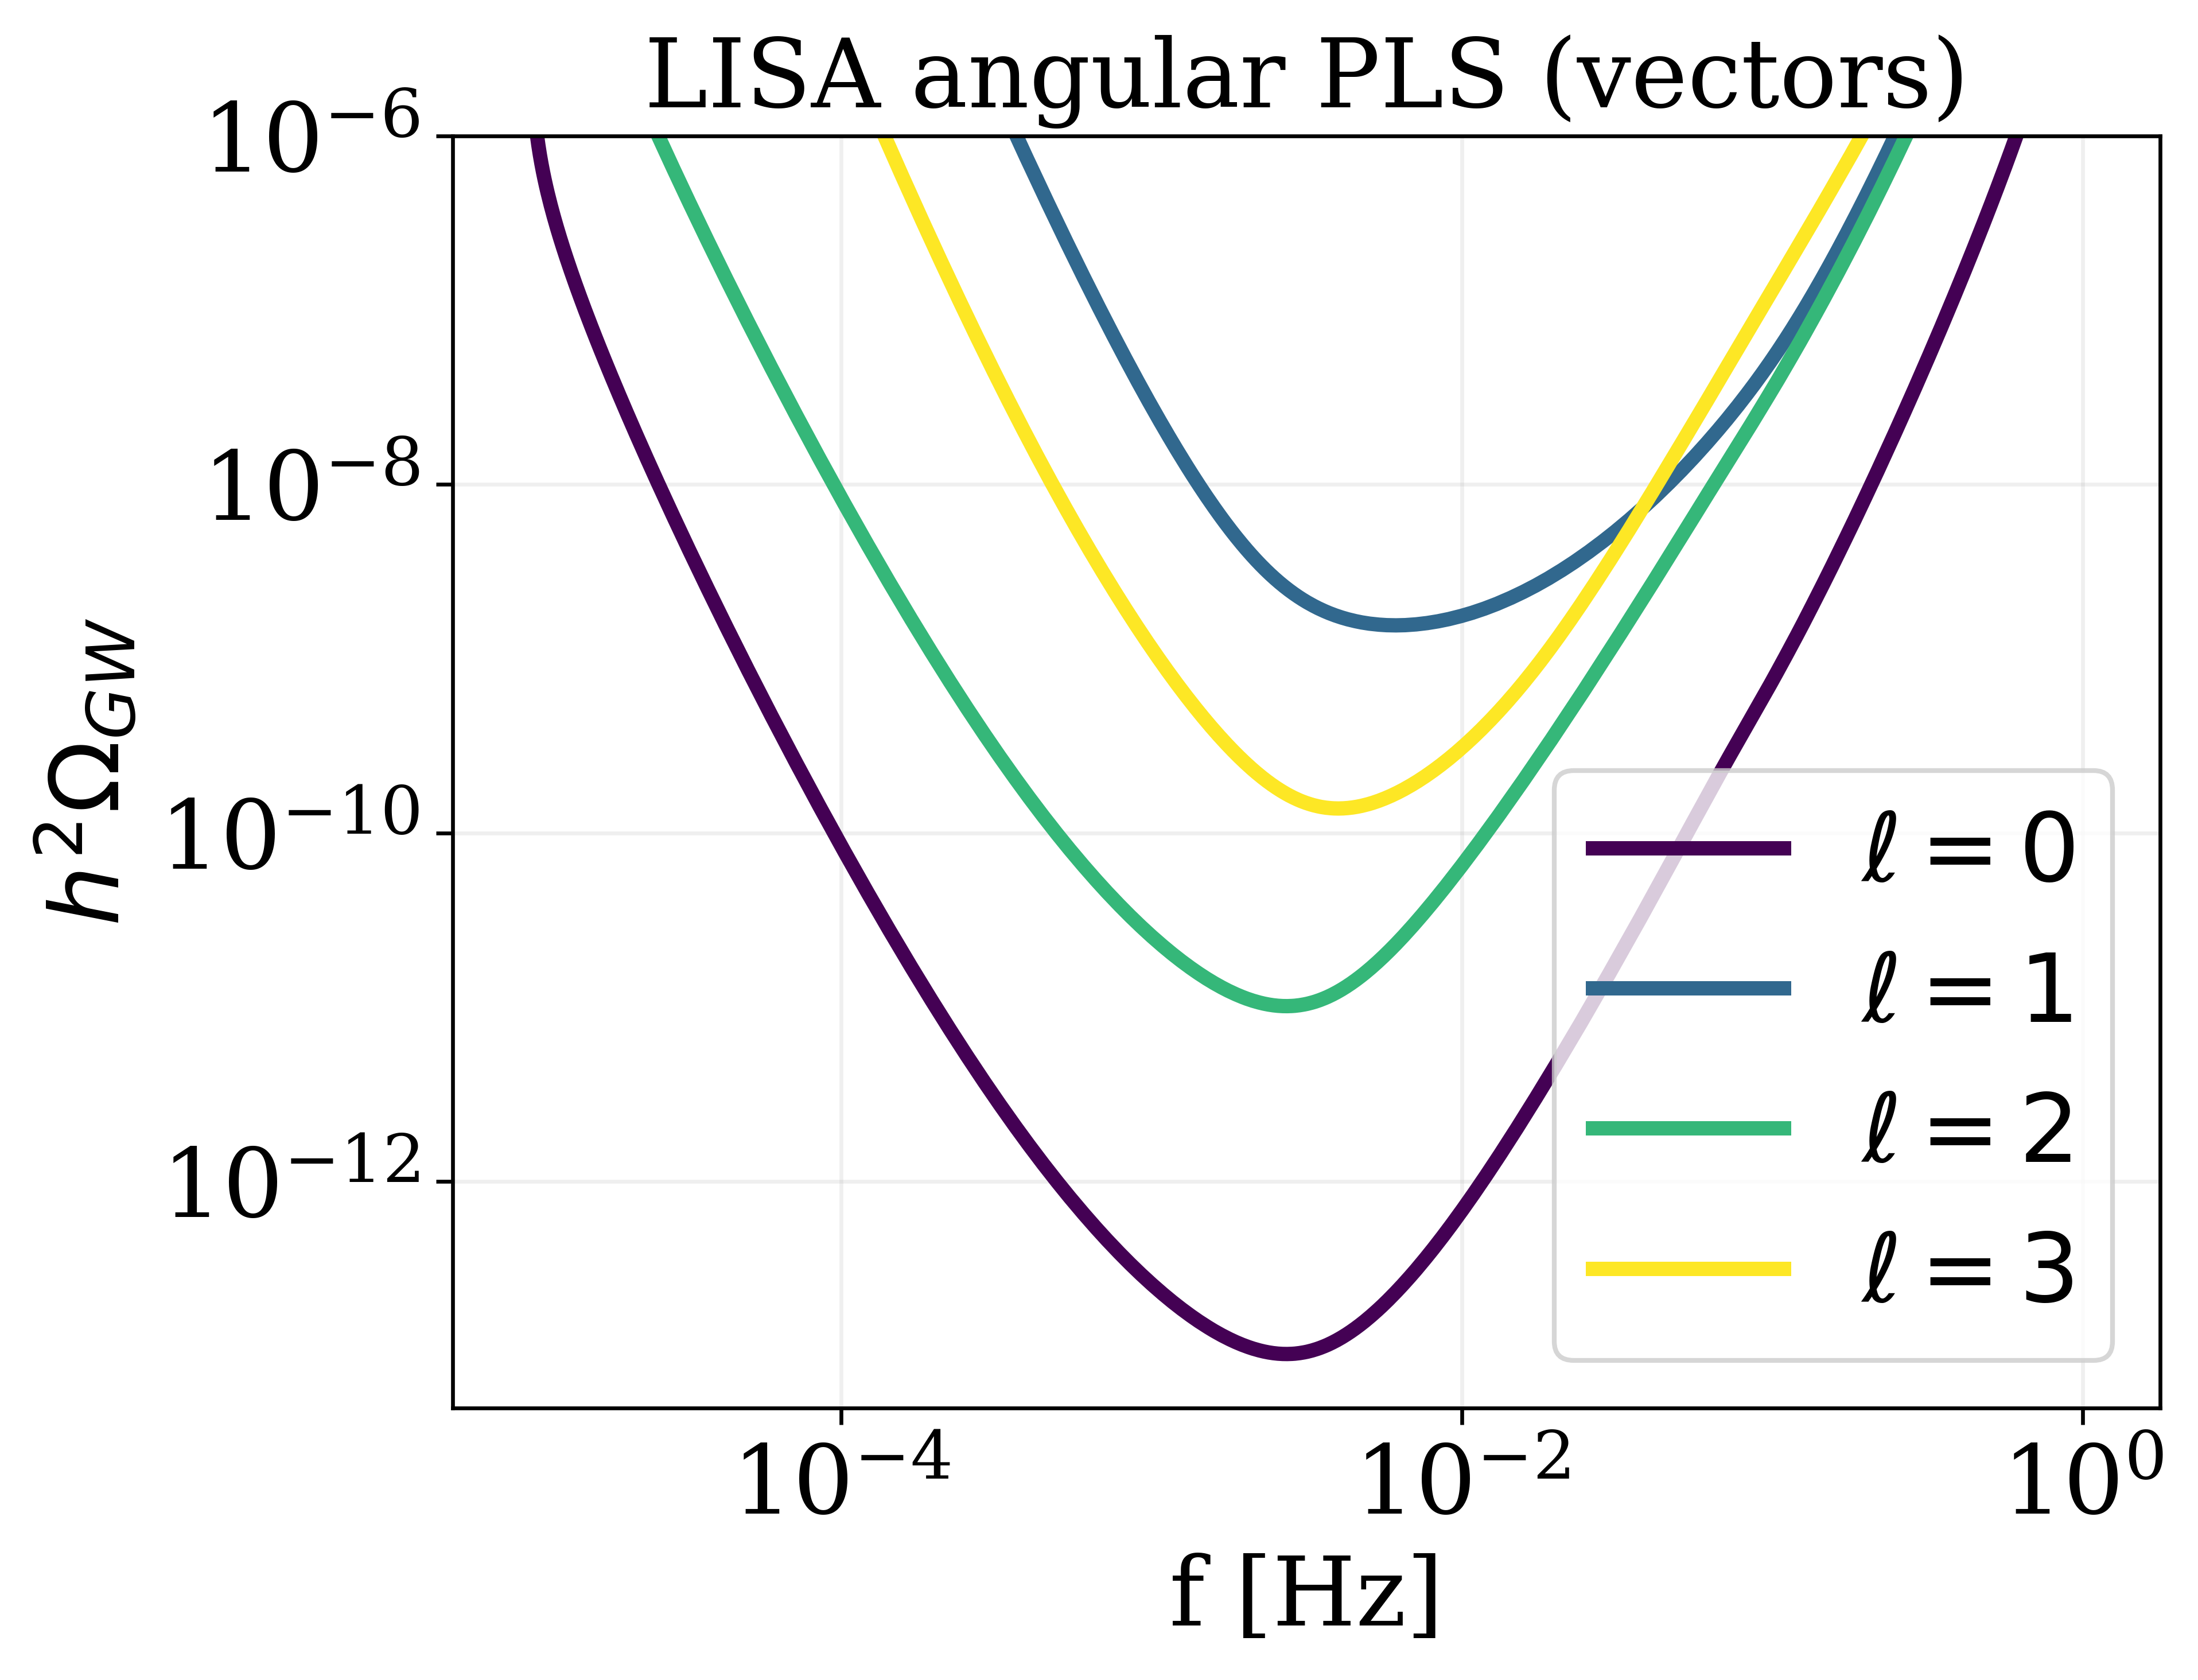

In [42]:
# vector

pls0_v = Sensitivity_ell.APLS_ell('LISA', 'Network', 0, f, 'v', 0, fref, snr, Tobs, 1)
pls1_v = Sensitivity_ell.APLS_ell('LISA', 'Network', 1, f, 'v', 0, fref, snr, Tobs,  1e-3)
pls2_v = Sensitivity_ell.APLS_ell('LISA', 'Network', 2, f, 'v', 0, fref, snr, Tobs,  1e-3)
pls3_v = Sensitivity_ell.APLS_ell('LISA', 'Network', 3, f, 'v', 0, fref, snr, Tobs,  1e-3)


idx_min_0_v = np.argmin(pls0_v)
idx_min_1_v = np.argmin(pls1_v)
idx_min_2_v = np.argmin(pls2_v)
idx_min_3_v = np.argmin(pls3_v)


print("Min pls_0_v:", pls0_v[idx_min_0_v], "f min:", f[idx_min_0_v])
print("Min pls_1_v:", pls1_v[idx_min_1_v], "f min:", f[idx_min_1_v])
print("Min pls_2_v:", pls2_v[idx_min_2_v], "f min:", f[idx_min_2_v])
print("Min pls_3_v:", pls3_v[idx_min_3_v], "f min:", f[idx_min_3_v])

colors = plt.cm.viridis(np.linspace(0, 1, 4))
plt.plot(f, pls0_v, label=r'$\ell=0$', color=colors[0], rasterized=True)
plt.plot(f, pls1_v, label=r'$\ell=1$', color=colors[1], rasterized=True)
plt.plot(f, pls2_v, label=r'$\ell=2$', color=colors[2], rasterized=True)
plt.plot(f, pls3_v, label=r'$\ell=3$', color=colors[3], rasterized=True)
#plt.plot(f, pls_t, label=r'$\ell=0$ tensor', color='red', linestyle='--', rasterized=True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$h^2\Omega_{GW}$')
plt.title(r'LISA angular PLS (vectors)')
plt.ylim(5e-14, 1e-6)
plt.grid(alpha=0.2, which='both')
plt.legend()

Min pls_0_s: 1.0162859724665419e-13 f min: 0.0027380251779278576
Min pls_1_s: 1.3911074267315572e-09 f min: 0.006064329395408062
Min pls_2_s: 5.044991955093985e-12 f min: 0.0027380251779278576
Min pls_3_s: 3.2652794764223795e-11 f min: 0.004005000757873611


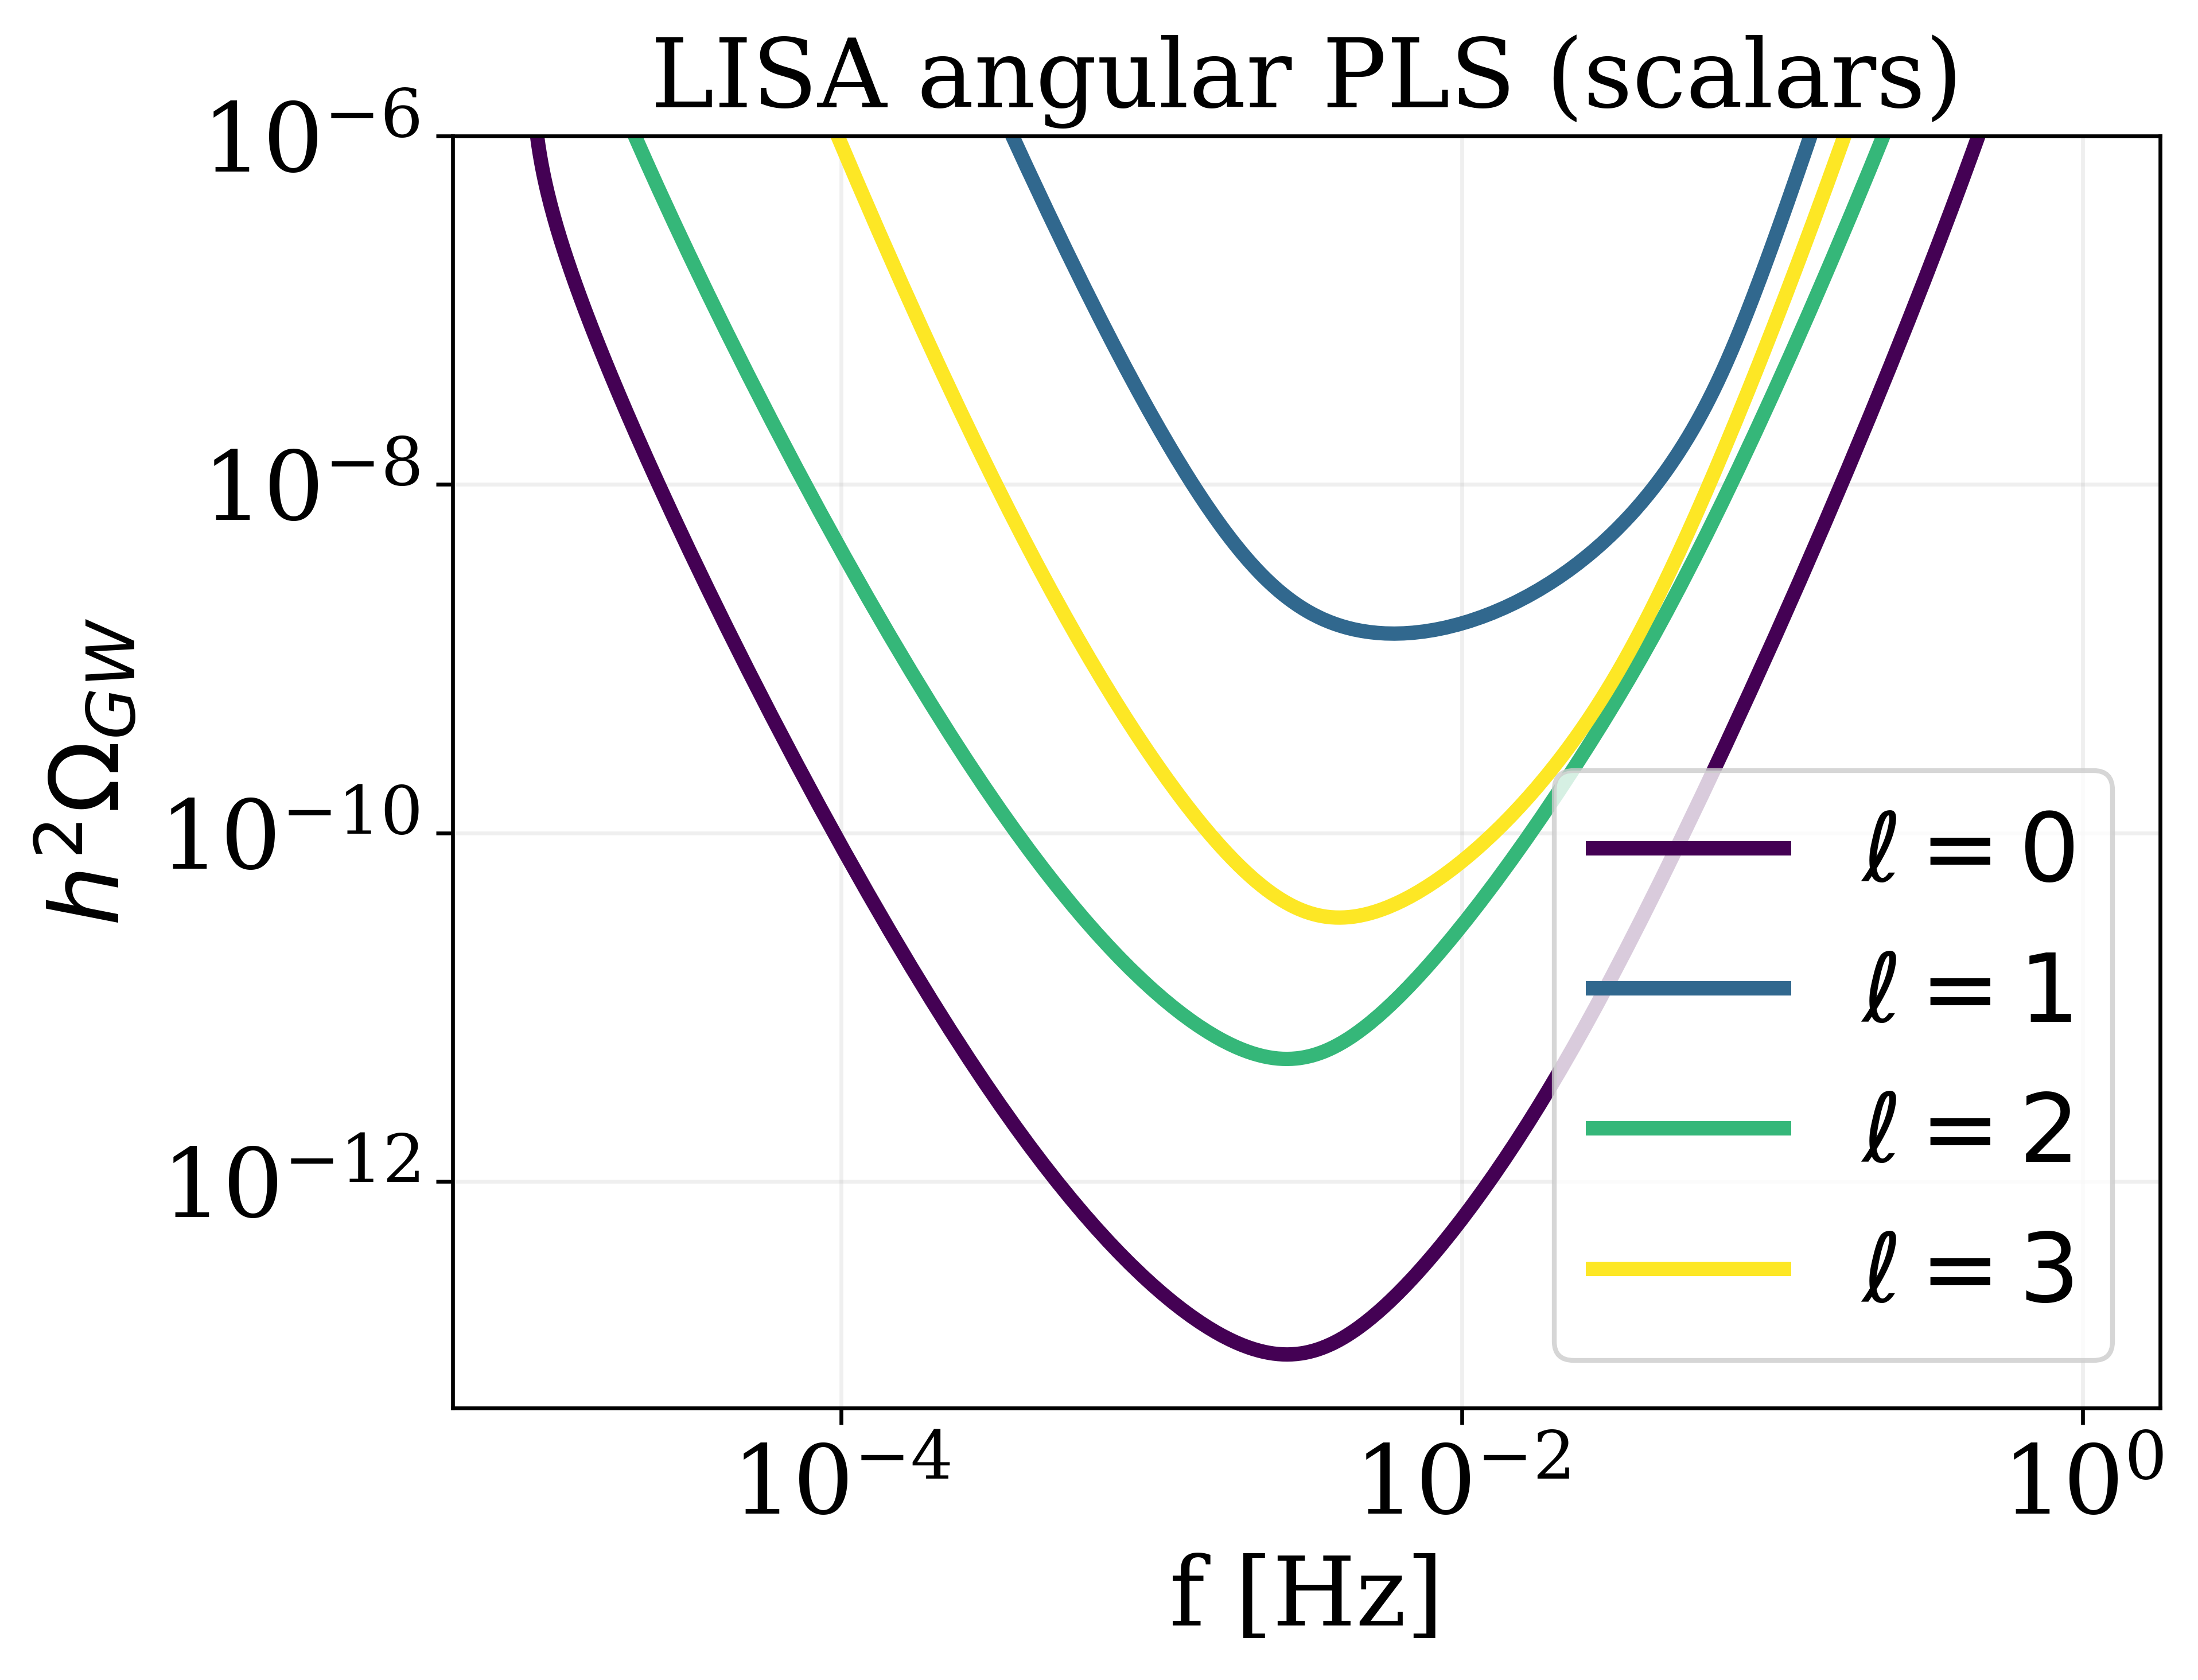

In [43]:
# scalar

pls0_s = Sensitivity_ell.APLS_ell('LISA', 'Network', 0, f, 's', 0, fref, snr, Tobs, 1)
pls1_s = Sensitivity_ell.APLS_ell('LISA', 'Network', 1, f, 's', 0, fref, snr, Tobs,  1e-3)
pls2_s = Sensitivity_ell.APLS_ell('LISA', 'Network', 2, f, 's', 0, fref, snr, Tobs,  1e-3)
pls3_s = Sensitivity_ell.APLS_ell('LISA', 'Network', 3, f, 's', 0, fref, snr, Tobs,  1e-3)


idx_min_0_s = np.argmin(pls0_s)
idx_min_1_s = np.argmin(pls1_s)
idx_min_2_s = np.argmin(pls2_s)
idx_min_3_s = np.argmin(pls3_s)


print("Min pls_0_s:", pls0_s[idx_min_0_s], "f min:", f[idx_min_0_s])
print("Min pls_1_s:", pls1_s[idx_min_1_s], "f min:", f[idx_min_1_s])
print("Min pls_2_s:", pls2_s[idx_min_2_s], "f min:", f[idx_min_2_s])
print("Min pls_3_s:", pls3_s[idx_min_3_s], "f min:", f[idx_min_3_s])

colors = plt.cm.viridis(np.linspace(0, 1, 4))
plt.plot(f, pls0_s, label=r'$\ell=0$', color=colors[0], rasterized=True)
plt.plot(f, pls1_s, label=r'$\ell=1$', color=colors[1], rasterized=True)
plt.plot(f, pls2_s, label=r'$\ell=2$', color=colors[2], rasterized=True)
plt.plot(f, pls3_s, label=r'$\ell=3$', color=colors[3], rasterized=True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$h^2\Omega_{GW}$')
plt.title(r'LISA angular PLS (scalars)')
plt.ylim(5e-14, 1e-6)
plt.grid(alpha=0.2, which='both')
plt.legend()

Min pls_0_V: 0.06583564193742757 f min: 2.7570233256095827e-05
Min pls_1_V: 3.952905494031575e-12 f min: 0.0027380251779278576
Min pls_2_V: 6.210604853904959e-11 f min: 0.004051423171114647
Min pls_3_V: 2.4070215177388245e-11 f min: 0.0027380251779278576


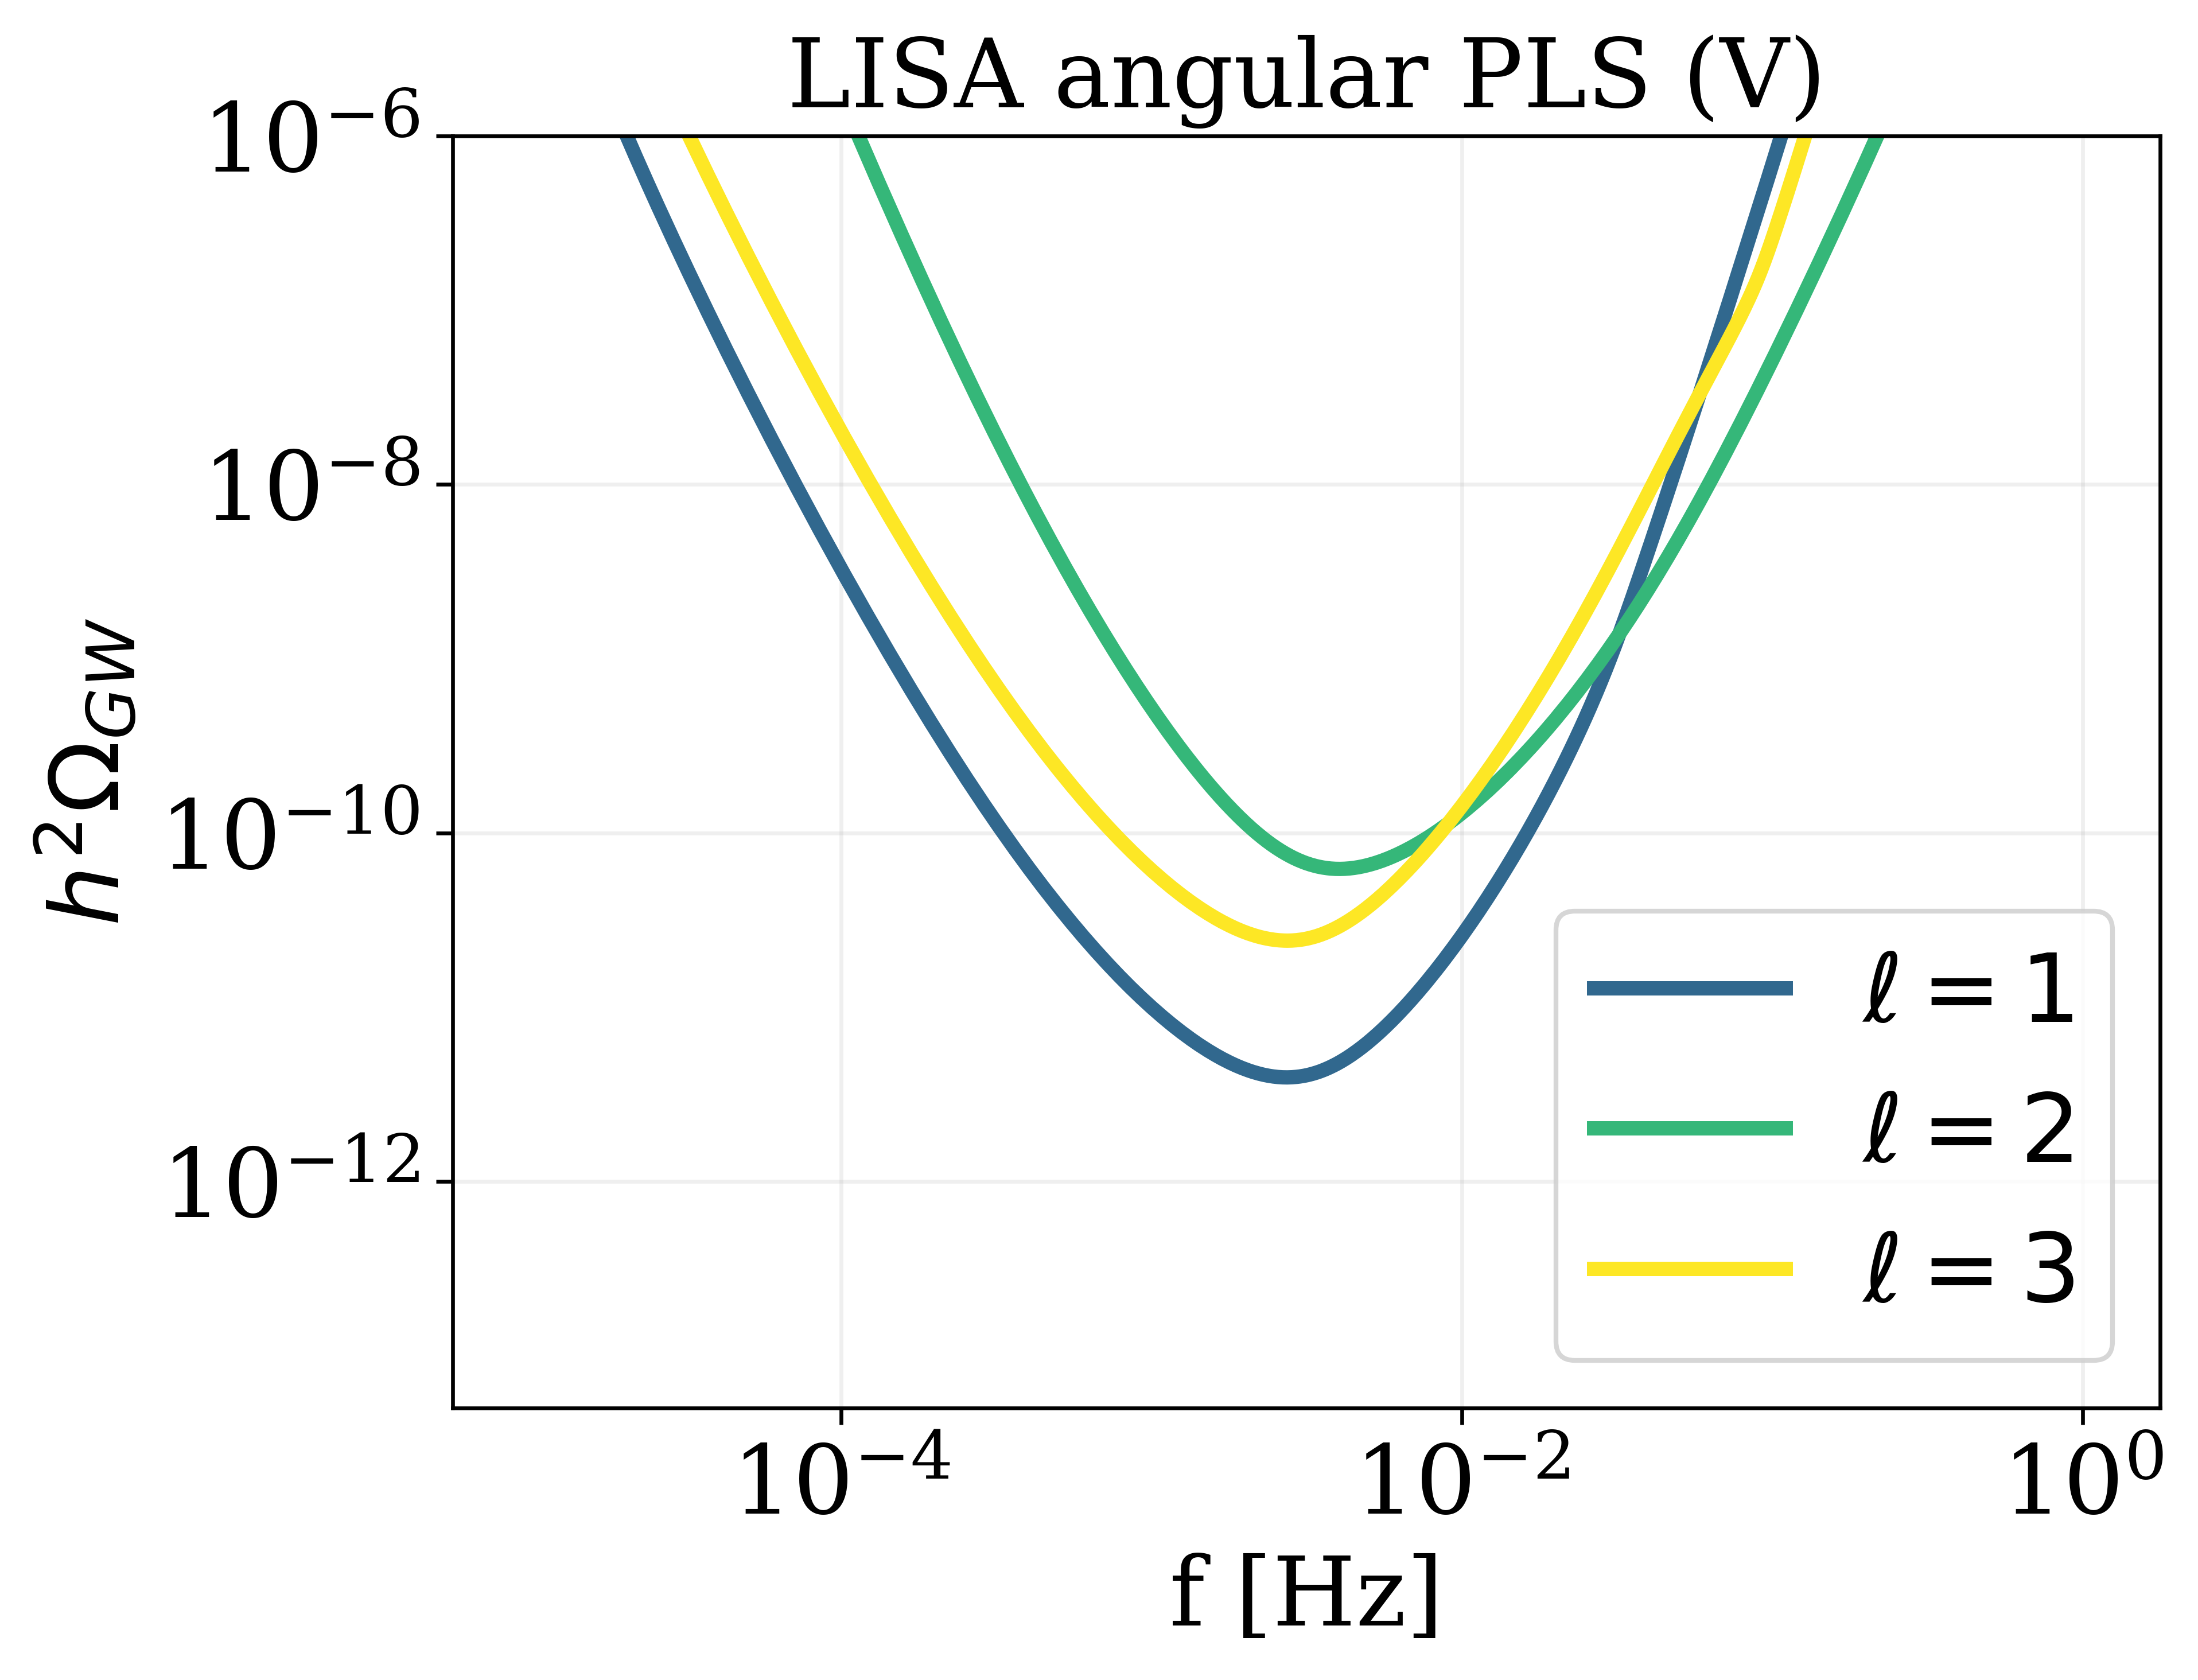

In [44]:
# V

pls0_V = Sensitivity_ell.APLS_ell('LISA', 'Network', 0, f, 'V', 0, fref, snr, Tobs, 1)
pls1_V = Sensitivity_ell.APLS_ell('LISA', 'Network', 1, f, 'V', 0, fref, snr, Tobs,  1e-3)
pls2_V = Sensitivity_ell.APLS_ell('LISA', 'Network', 2, f, 'V', 0, fref, snr, Tobs,  1e-3)
pls3_V = Sensitivity_ell.APLS_ell('LISA', 'Network', 3, f, 'V', 0, fref, snr, Tobs,  1e-3)

idx_min_0_V = np.argmin(pls0_V)
idx_min_1_V = np.argmin(pls1_V)
idx_min_2_V = np.argmin(pls2_V)
idx_min_3_V = np.argmin(pls3_V)


print("Min pls_0_V:", pls0_V[idx_min_0_V], "f min:", f[idx_min_0_V])
print("Min pls_1_V:", pls1_V[idx_min_1_V], "f min:", f[idx_min_1_V])
print("Min pls_2_V:", pls2_V[idx_min_2_V], "f min:", f[idx_min_2_V])
print("Min pls_3_V:", pls3_V[idx_min_3_V], "f min:", f[idx_min_3_V])

colors = plt.cm.viridis(np.linspace(0, 1, 4))
#plt.plot(f, pls0_V, label=r'$\ell=0$', color=colors[0], rasterized=True)
plt.plot(f, pls1_V, label=r'$\ell=1$', color=colors[1], rasterized=True)
plt.plot(f, pls2_V, label=r'$\ell=2$', color=colors[2], rasterized=True)
plt.plot(f, pls3_V, label=r'$\ell=3$', color=colors[3], rasterized=True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$h^2\Omega_{GW}$')
plt.title(r'LISA angular PLS (V)')
plt.ylim(5e-14, 1e-6)
plt.grid(alpha=0.2, which='both')
plt.legend(loc='lower right')